# Web Scraping & Text Analysis Project: 
## Analysing text from WallStreetBets

In [1]:
# Import python library PRAW, check to see if it is already installed, if not, install and load
try:
    import praw
except ImportError:
    %pip install praw
    import praw

In [2]:
# Input your credentials here
# For the purpose of demonstration, below sensitive info are removed

reddit = praw.Reddit(
    client_id="redacted",
    client_secret="redacted",
    user_agent="testscript by u/redacted",
)

In [3]:
for submission in reddit.subreddit("wallstreetbets").hot(limit=10):
    print(submission.title)
    print(submission.url)

What Are Your Moves Tomorrow, March 28, 2024
https://www.reddit.com/r/wallstreetbets/comments/1bpbdye/what_are_your_moves_tomorrow_march_28_2024/
Most Anticipated Earnings Releases for the week beginning March 25th, 2024
https://i.redd.it/ohpvebt70rpc1.png
Well, we knew this was coming 🤣
https://i.redd.it/y2n68712xvqc1.png
u/spez is King Regard , he sold 500k shares of RDDT for $32.30 per share
https://i.redd.it/10h63gy2kyqc1.png
Providing RDDT shareholder value, one insult at a time!
https://i.redd.it/7og5ptgygwqc1.jpeg
that was sick yo
https://i.redd.it/eor93s2tsxqc1.jpeg
This is it
https://i.redd.it/itnzy8atnxqc1.jpeg
If I had to sum up why Boeing is a terrible company in one chart it would be this (slashed investment vs. aggressive shareholder returns)
https://i.redd.it/d1lvhcimowqc1.png
Weed legalization this year boys.
https://i.redd.it/trzmvdzg5xqc1.jpeg
Made more in March than I did all last year as a UPS Big Rig Driver
https://www.reddit.com/gallery/1bp4klk


In [4]:
# We first create a submission object
url = "https://www.reddit.com/r/wallstreetbets/comments/1bohfyg/what_are_your_moves_tomorrow_march_27_2024/"
submission = reddit.submission(url=url)

In [5]:
document=[]
submission.comments.replace_more(limit=20)
for top_level_comment in submission.comments:
        document.append(top_level_comment.body)

In [6]:
document

['20k citi loan guy on suicide watch',
 'That GameStop guy is about to jump off a building',
 'POUR ONE OUT FOR THE CITI LOAN GAMER',
 'Do you ever think that there may be a broker that\'s watching your trades thinking "what the fuck"?',
 'Who bought at $77 ![img](emote|t5_2th52|4271)',
 '>stonkhold syndrome\n\nLMAO',
 'smell like clapped ass cheeks up in here',
 '$DJT is currently trading at $64.23 in premarket! Should be a very exciting day. Good luck everyone!',
 'Lost a months salary today ![img](emote|t5_2th52|4271)![img](emote|t5_2th52|31225)![img](emote|t5_2th52|31225)',
 '#PSA: YOUR OPTIONS ARE EXPIRING WORTHLESS ON THURSDAY, NOT FRIDAY. PLEASE ADJUST!',
 "I mean, I'm fuckin stupid, but some of the shit I see posted here makes me feel better about myself",
 'There are some people in here that managed to buy DWAC/DJT 90 calls for $4 when the price was $40 and after all this are down 75%.\n\nThey could have escaped with a very small profit when the price was $75 or at the very be

In [7]:
#Let's put this into a dataframe
author=[]
submission.comments.replace_more(limit=5)
for top_level_comment in submission.comments:
        author.append(top_level_comment.author)

import pandas as pd

df = pd.DataFrame(list(zip(author, document)),
               columns =['Author', 'Comment'])

In [8]:
df

Author                                            Comment
0           nowayystupidd                 20k citi loan guy on suicide watch
1           johnston-zach  That GameStop guy is about to jump off a building
2                   aswog               POUR ONE OUT FOR THE CITI LOAN GAMER
3           whitesquirrle  Do you ever think that there may be a broker t...
4     AngryYoungandPoor86      Who bought at $77 ![img](emote|t5_2th52|4271)
...                   ...                                                ...
2220   iBoughtAtTheBottom          That meta spike gave my calls blue balls.
2221              osendze  Big sad for my calls, gave up all gains today,...
2222       Prior_Industry                              CUK 👀 bit on the nose
2223   Dadmomangrypants88  Anyone else have issues with Schwab filling or...
2224         Ijustquaffed               why the fuck is COIN up 1.5% already

[2225 rows x 2 columns]

In [9]:
# Save dataframe in csv format to computer

df.to_csv('praw_output_wsb.csv')

In [10]:
# we will pick one of the rows as our example sentence for the following demonstrations.
example = df['Comment'].to_string()
type(example)

str

In [11]:
# Import python library truecase, check to see if it is already installed, if not, install and load
try:
    import truecase
except ImportError:
    %pip install truecase
    import truecase

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tcliu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# example
print(truecase.get_true_case('grady DICK pLays fOr The torONto raptORS'))

Grady Dick plays for the Toronto Raptors


In [14]:
print(truecase.get_true_case(example))

0 20K Citi loan guy on suicide watch 1 that Gamestop guy is about to jump off a building 2 pour one out for the Citi loan Gamer 3 do you ever think that there may be a broker t...4 who bought at $77! [Img] (Emote|T5_2Th52|4271) 5> Stonkhold Syndrome\N\Nlmao 6 smell like clapped ass cheeks up in here 7 $Djt is currently trading at $64.23 in Premark...8 lost a months salary today! [Img] (Emote|T5_2Th...9 #PSA: your options are expiring worthless on t...10 I mean, I'm Fuckin stupid, but some of the shi...11 there are some people in here that managed to...12 held my $Nvda and $Djt weeklies into close . Le...13 was up $7K around lunch then proceeded to end...14 lost $1300 today ..... Jacked off .... clear mind .... 15 I need that Gamecock loss Porn immediately 16 Djt gains gone with game whore why am I this s...17 turns out buying high and selling low is not P...18 every time I think this sub might finally be f...19 I like when I buy a call, it goes up 100% in f...20 Wtf is $Cuk! [Img] (Emo

In [15]:
import re
clean_example = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", example)
clean_example = re.sub(r"\W+", " ", clean_example)
clean_example

'0 20k citi loan guy on suicide watch 1 That GameStop guy is about to jump off a building 2 POUR ONE OUT FOR THE CITI LOAN GAMER 3 Do you ever think that there may be a broker t 4 Who bought at 77 5 stonkhold syndrome n nLMAO 6 smell like clapped ass cheeks up in here 7 DJT is currently trading at 64 23 in premark 8 Lost a months salary today img emote t5_2th 9 PSA YOUR OPTIONS ARE EXPIRING WORTHLESS ON T 10 I mean I m fuckin stupid but some of the shi 11 There are some people in here that managed to 12 Held my NVDA and DJT weeklies into close Le 13 Was up 7k around lunch then proceeded to end 14 Lost 1300 today jacked off clear mind 15 I need that Gamecock loss porn immediately 16 DJT gains gone with game whore why am i this s 17 Turns out buying high and selling low is not p 18 Every time I think this sub might finally be f 19 I like when I buy a call it goes up 100 in f 20 wtf is CUK 21 I ve got 99 problems and my portfolio is all o 22 GameWhore Cucked you again n nFool me once 23 B

In [16]:
# Import python library nltk, check to see if it is already installed, if not, install and load
try:
    import nltk
except ImportError:
    %pip install nltk
    import nltk
    
nltk.download('punkt') # you only need to run this line once on your computer and it will be saved to your computer.

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tcliu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
tokens = word_tokenize(clean_example)
print(tokens)

['0', '20k', 'citi', 'loan', 'guy', 'on', 'suicide', 'watch', '1', 'That', 'GameStop', 'guy', 'is', 'about', 'to', 'jump', 'off', 'a', 'building', '2', 'POUR', 'ONE', 'OUT', 'FOR', 'THE', 'CITI', 'LOAN', 'GAMER', '3', 'Do', 'you', 'ever', 'think', 'that', 'there', 'may', 'be', 'a', 'broker', 't', '4', 'Who', 'bought', 'at', '77', '5', 'stonkhold', 'syndrome', 'n', 'nLMAO', '6', 'smell', 'like', 'clapped', 'ass', 'cheeks', 'up', 'in', 'here', '7', 'DJT', 'is', 'currently', 'trading', 'at', '64', '23', 'in', 'premark', '8', 'Lost', 'a', 'months', 'salary', 'today', 'img', 'emote', 't5_2th', '9', 'PSA', 'YOUR', 'OPTIONS', 'ARE', 'EXPIRING', 'WORTHLESS', 'ON', 'T', '10', 'I', 'mean', 'I', 'm', 'fuckin', 'stupid', 'but', 'some', 'of', 'the', 'shi', '11', 'There', 'are', 'some', 'people', 'in', 'here', 'that', 'managed', 'to', '12', 'Held', 'my', 'NVDA', 'and', 'DJT', 'weeklies', 'into', 'close', 'Le', '13', 'Was', 'up', '7k', 'around', 'lunch', 'then', 'proceeded', 'to', 'end', '14', 'Lost'

In [18]:
from nltk.util import ngrams

#2-gram example:
grams = ngrams(tokens, 2)
for gram in grams:
        print(gram)

('0', '20k')
('20k', 'citi')
('citi', 'loan')
('loan', 'guy')
('guy', 'on')
('on', 'suicide')
('suicide', 'watch')
('watch', '1')
('1', 'That')
('That', 'GameStop')
('GameStop', 'guy')
('guy', 'is')
('is', 'about')
('about', 'to')
('to', 'jump')
('jump', 'off')
('off', 'a')
('a', 'building')
('building', '2')
('2', 'POUR')
('POUR', 'ONE')
('ONE', 'OUT')
('OUT', 'FOR')
('FOR', 'THE')
('THE', 'CITI')
('CITI', 'LOAN')
('LOAN', 'GAMER')
('GAMER', '3')
('3', 'Do')
('Do', 'you')
('you', 'ever')
('ever', 'think')
('think', 'that')
('that', 'there')
('there', 'may')
('may', 'be')
('be', 'a')
('a', 'broker')
('broker', 't')
('t', '4')
('4', 'Who')
('Who', 'bought')
('bought', 'at')
('at', '77')
('77', '5')
('5', 'stonkhold')
('stonkhold', 'syndrome')
('syndrome', 'n')
('n', 'nLMAO')
('nLMAO', '6')
('6', 'smell')
('smell', 'like')
('like', 'clapped')
('clapped', 'ass')
('ass', 'cheeks')
('cheeks', 'up')
('up', 'in')
('in', 'here')
('here', '7')
('7', 'DJT')
('DJT', 'is')
('is', 'currently')
('cu

In [19]:
#3-gram example:
grams = ngrams(tokens, 3)
for gram in grams:
        print(gram)

('0', '20k', 'citi')
('20k', 'citi', 'loan')
('citi', 'loan', 'guy')
('loan', 'guy', 'on')
('guy', 'on', 'suicide')
('on', 'suicide', 'watch')
('suicide', 'watch', '1')
('watch', '1', 'That')
('1', 'That', 'GameStop')
('That', 'GameStop', 'guy')
('GameStop', 'guy', 'is')
('guy', 'is', 'about')
('is', 'about', 'to')
('about', 'to', 'jump')
('to', 'jump', 'off')
('jump', 'off', 'a')
('off', 'a', 'building')
('a', 'building', '2')
('building', '2', 'POUR')
('2', 'POUR', 'ONE')
('POUR', 'ONE', 'OUT')
('ONE', 'OUT', 'FOR')
('OUT', 'FOR', 'THE')
('FOR', 'THE', 'CITI')
('THE', 'CITI', 'LOAN')
('CITI', 'LOAN', 'GAMER')
('LOAN', 'GAMER', '3')
('GAMER', '3', 'Do')
('3', 'Do', 'you')
('Do', 'you', 'ever')
('you', 'ever', 'think')
('ever', 'think', 'that')
('think', 'that', 'there')
('that', 'there', 'may')
('there', 'may', 'be')
('may', 'be', 'a')
('be', 'a', 'broker')
('a', 'broker', 't')
('broker', 't', '4')
('t', '4', 'Who')
('4', 'Who', 'bought')
('Who', 'bought', 'at')
('bought', 'at', '77')

In [20]:
nltk.download("stopwords") # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.corpus import stopwords

clean_tokens = nltk.word_tokenize(clean_example)
filtered_words = [word for word in clean_tokens if word not in stopwords.words('english')]
filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tcliu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['0',
 '20k',
 'citi',
 'loan',
 'guy',
 'suicide',
 'watch',
 '1',
 'That',
 'GameStop',
 'guy',
 'jump',
 'building',
 '2',
 'POUR',
 'ONE',
 'OUT',
 'FOR',
 'THE',
 'CITI',
 'LOAN',
 'GAMER',
 '3',
 'Do',
 'ever',
 'think',
 'may',
 'broker',
 '4',
 'Who',
 'bought',
 '77',
 '5',
 'stonkhold',
 'syndrome',
 'n',
 'nLMAO',
 '6',
 'smell',
 'like',
 'clapped',
 'ass',
 'cheeks',
 '7',
 'DJT',
 'currently',
 'trading',
 '64',
 '23',
 'premark',
 '8',
 'Lost',
 'months',
 'salary',
 'today',
 'img',
 'emote',
 't5_2th',
 '9',
 'PSA',
 'YOUR',
 'OPTIONS',
 'ARE',
 'EXPIRING',
 'WORTHLESS',
 'ON',
 'T',
 '10',
 'I',
 'mean',
 'I',
 'fuckin',
 'stupid',
 'shi',
 '11',
 'There',
 'people',
 'managed',
 '12',
 'Held',
 'NVDA',
 'DJT',
 'weeklies',
 'close',
 'Le',
 '13',
 'Was',
 '7k',
 'around',
 'lunch',
 'proceeded',
 'end',
 '14',
 'Lost',
 '1300',
 'today',
 'jacked',
 'clear',
 'mind',
 '15',
 'I',
 'need',
 'Gamecock',
 'loss',
 'porn',
 'immediately',
 '16',
 'DJT',
 'gains',
 'gone'

In [21]:
nltk.download('wordnet') # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.stem.porter import PorterStemmer
porter = [PorterStemmer().stem(word) for word in filtered_words]
porter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tcliu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['0',
 '20k',
 'citi',
 'loan',
 'guy',
 'suicid',
 'watch',
 '1',
 'that',
 'gamestop',
 'guy',
 'jump',
 'build',
 '2',
 'pour',
 'one',
 'out',
 'for',
 'the',
 'citi',
 'loan',
 'gamer',
 '3',
 'do',
 'ever',
 'think',
 'may',
 'broker',
 '4',
 'who',
 'bought',
 '77',
 '5',
 'stonkhold',
 'syndrom',
 'n',
 'nlmao',
 '6',
 'smell',
 'like',
 'clap',
 'ass',
 'cheek',
 '7',
 'djt',
 'current',
 'trade',
 '64',
 '23',
 'premark',
 '8',
 'lost',
 'month',
 'salari',
 'today',
 'img',
 'emot',
 't5_2th',
 '9',
 'psa',
 'your',
 'option',
 'are',
 'expir',
 'worthless',
 'on',
 't',
 '10',
 'i',
 'mean',
 'i',
 'fuckin',
 'stupid',
 'shi',
 '11',
 'there',
 'peopl',
 'manag',
 '12',
 'held',
 'nvda',
 'djt',
 'weekli',
 'close',
 'le',
 '13',
 'wa',
 '7k',
 'around',
 'lunch',
 'proceed',
 'end',
 '14',
 'lost',
 '1300',
 'today',
 'jack',
 'clear',
 'mind',
 '15',
 'i',
 'need',
 'gamecock',
 'loss',
 'porn',
 'immedi',
 '16',
 'djt',
 'gain',
 'gone',
 'game',
 'whore',
 '17',
 'turn'

In [22]:
from nltk.stem import WordNetLemmatizer
wordnet = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]
wordnet

['0',
 '20k',
 'citi',
 'loan',
 'guy',
 'suicide',
 'watch',
 '1',
 'That',
 'GameStop',
 'guy',
 'jump',
 'building',
 '2',
 'POUR',
 'ONE',
 'OUT',
 'FOR',
 'THE',
 'CITI',
 'LOAN',
 'GAMER',
 '3',
 'Do',
 'ever',
 'think',
 'may',
 'broker',
 '4',
 'Who',
 'bought',
 '77',
 '5',
 'stonkhold',
 'syndrome',
 'n',
 'nLMAO',
 '6',
 'smell',
 'like',
 'clapped',
 'as',
 'cheek',
 '7',
 'DJT',
 'currently',
 'trading',
 '64',
 '23',
 'premark',
 '8',
 'Lost',
 'month',
 'salary',
 'today',
 'img',
 'emote',
 't5_2th',
 '9',
 'PSA',
 'YOUR',
 'OPTIONS',
 'ARE',
 'EXPIRING',
 'WORTHLESS',
 'ON',
 'T',
 '10',
 'I',
 'mean',
 'I',
 'fuckin',
 'stupid',
 'shi',
 '11',
 'There',
 'people',
 'managed',
 '12',
 'Held',
 'NVDA',
 'DJT',
 'weekly',
 'close',
 'Le',
 '13',
 'Was',
 '7k',
 'around',
 'lunch',
 'proceeded',
 'end',
 '14',
 'Lost',
 '1300',
 'today',
 'jacked',
 'clear',
 'mind',
 '15',
 'I',
 'need',
 'Gamecock',
 'loss',
 'porn',
 'immediately',
 '16',
 'DJT',
 'gain',
 'gone',
 'ga

In [23]:
# Running it through preprocessing
import nltk
import truecase
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def preprocess(x):
    # Remove unwanted characters
    x = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", x)
    x = re.sub(r"\W+", " ", x)
    
    # Truecase
    x = truecase.get_true_case(x)
    
    #Remove stopwards and lemmatize
    x = [WordNetLemmatizer().lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

df['clean'] = df['Comment'].apply(preprocess)
df['length'] = df['clean'].apply(len) # to add a new column for wordcount

display(df)

Author                                            Comment  \
0           nowayystupidd                 20k citi loan guy on suicide watch   
1           johnston-zach  That GameStop guy is about to jump off a building   
2                   aswog               POUR ONE OUT FOR THE CITI LOAN GAMER   
3           whitesquirrle  Do you ever think that there may be a broker t...   
4     AngryYoungandPoor86      Who bought at $77 ![img](emote|t5_2th52|4271)   
...                   ...                                                ...   
2220   iBoughtAtTheBottom          That meta spike gave my calls blue balls.   
2221              osendze  Big sad for my calls, gave up all gains today,...   
2222       Prior_Industry                              CUK 👀 bit on the nose   
2223   Dadmomangrypants88  Anyone else have issues with Schwab filling or...   
2224         Ijustquaffed               why the fuck is COIN up 1.5% already   

                                                  clean  length  
0                       20K Citi loan guy suicide watch      31  
1                       That Gamestop guy jump building      31  
2                              Pour one Citi loan Gamer      24  
3     Do ever think may broker watching trade thinki...      53  
4                                         Who bought 77      13  
...                                                 ...     ...  
2220                That Meta spike gave call blue ball      35  
2221             Big sad call gave gain today sure move      38  
2222                                       Cuk bit nose      12  
2223             Anyone else issue Schwab filling order      38  
2224                          Why fuck coin 1 5 already      25  

[2225 rows x 4 columns]

In [24]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [25]:
from textblob import TextBlob

df['sentiment'] = df['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [26]:
display(df)

Author                                            Comment  \
0           nowayystupidd                 20k citi loan guy on suicide watch   
1           johnston-zach  That GameStop guy is about to jump off a building   
2                   aswog               POUR ONE OUT FOR THE CITI LOAN GAMER   
3           whitesquirrle  Do you ever think that there may be a broker t...   
4     AngryYoungandPoor86      Who bought at $77 ![img](emote|t5_2th52|4271)   
...                   ...                                                ...   
2220   iBoughtAtTheBottom          That meta spike gave my calls blue balls.   
2221              osendze  Big sad for my calls, gave up all gains today,...   
2222       Prior_Industry                              CUK 👀 bit on the nose   
2223   Dadmomangrypants88  Anyone else have issues with Schwab filling or...   
2224         Ijustquaffed               why the fuck is COIN up 1.5% already   

                                                  clean  length  sentiment  
0                       20K Citi loan guy suicide watch      31        0.0  
1                       That Gamestop guy jump building      31        0.0  
2                              Pour one Citi loan Gamer      24        0.0  
3     Do ever think may broker watching trade thinki...      53       -0.4  
4                                         Who bought 77      13        0.0  
...                                                 ...     ...        ...  
2220                That Meta spike gave call blue ball      35        0.0  
2221             Big sad call gave gain today sure move      38        0.0  
2222                                       Cuk bit nose      12        0.0  
2223             Anyone else issue Schwab filling order      38        0.0  
2224                          Why fuck coin 1 5 already      25       -0.4  

[2225 rows x 5 columns]

In [27]:
# Import python library yellowbrick, check to see if it is already installed, if not, install and load
try:
    from yellowbrick.text import FreqDistVisualizer
    from yellowbrick.datasets import load_hobbies
except ImportError:
    %pip install yellowbrick
    from yellowbrick.text import FreqDistVisualizer
    from yellowbrick.datasets import load_hobbies

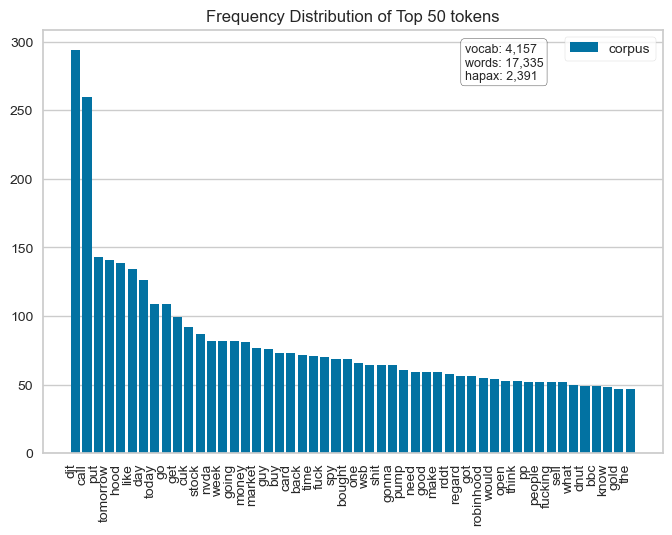

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


# default is 1-gram
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

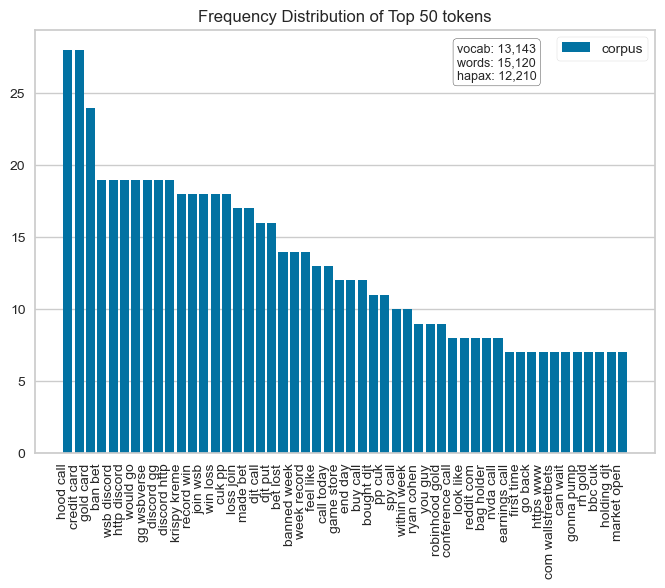

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [29]:
# Let's try 2-grams
vectorizer = CountVectorizer(ngram_range=(2,2))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

done in 0.596s.


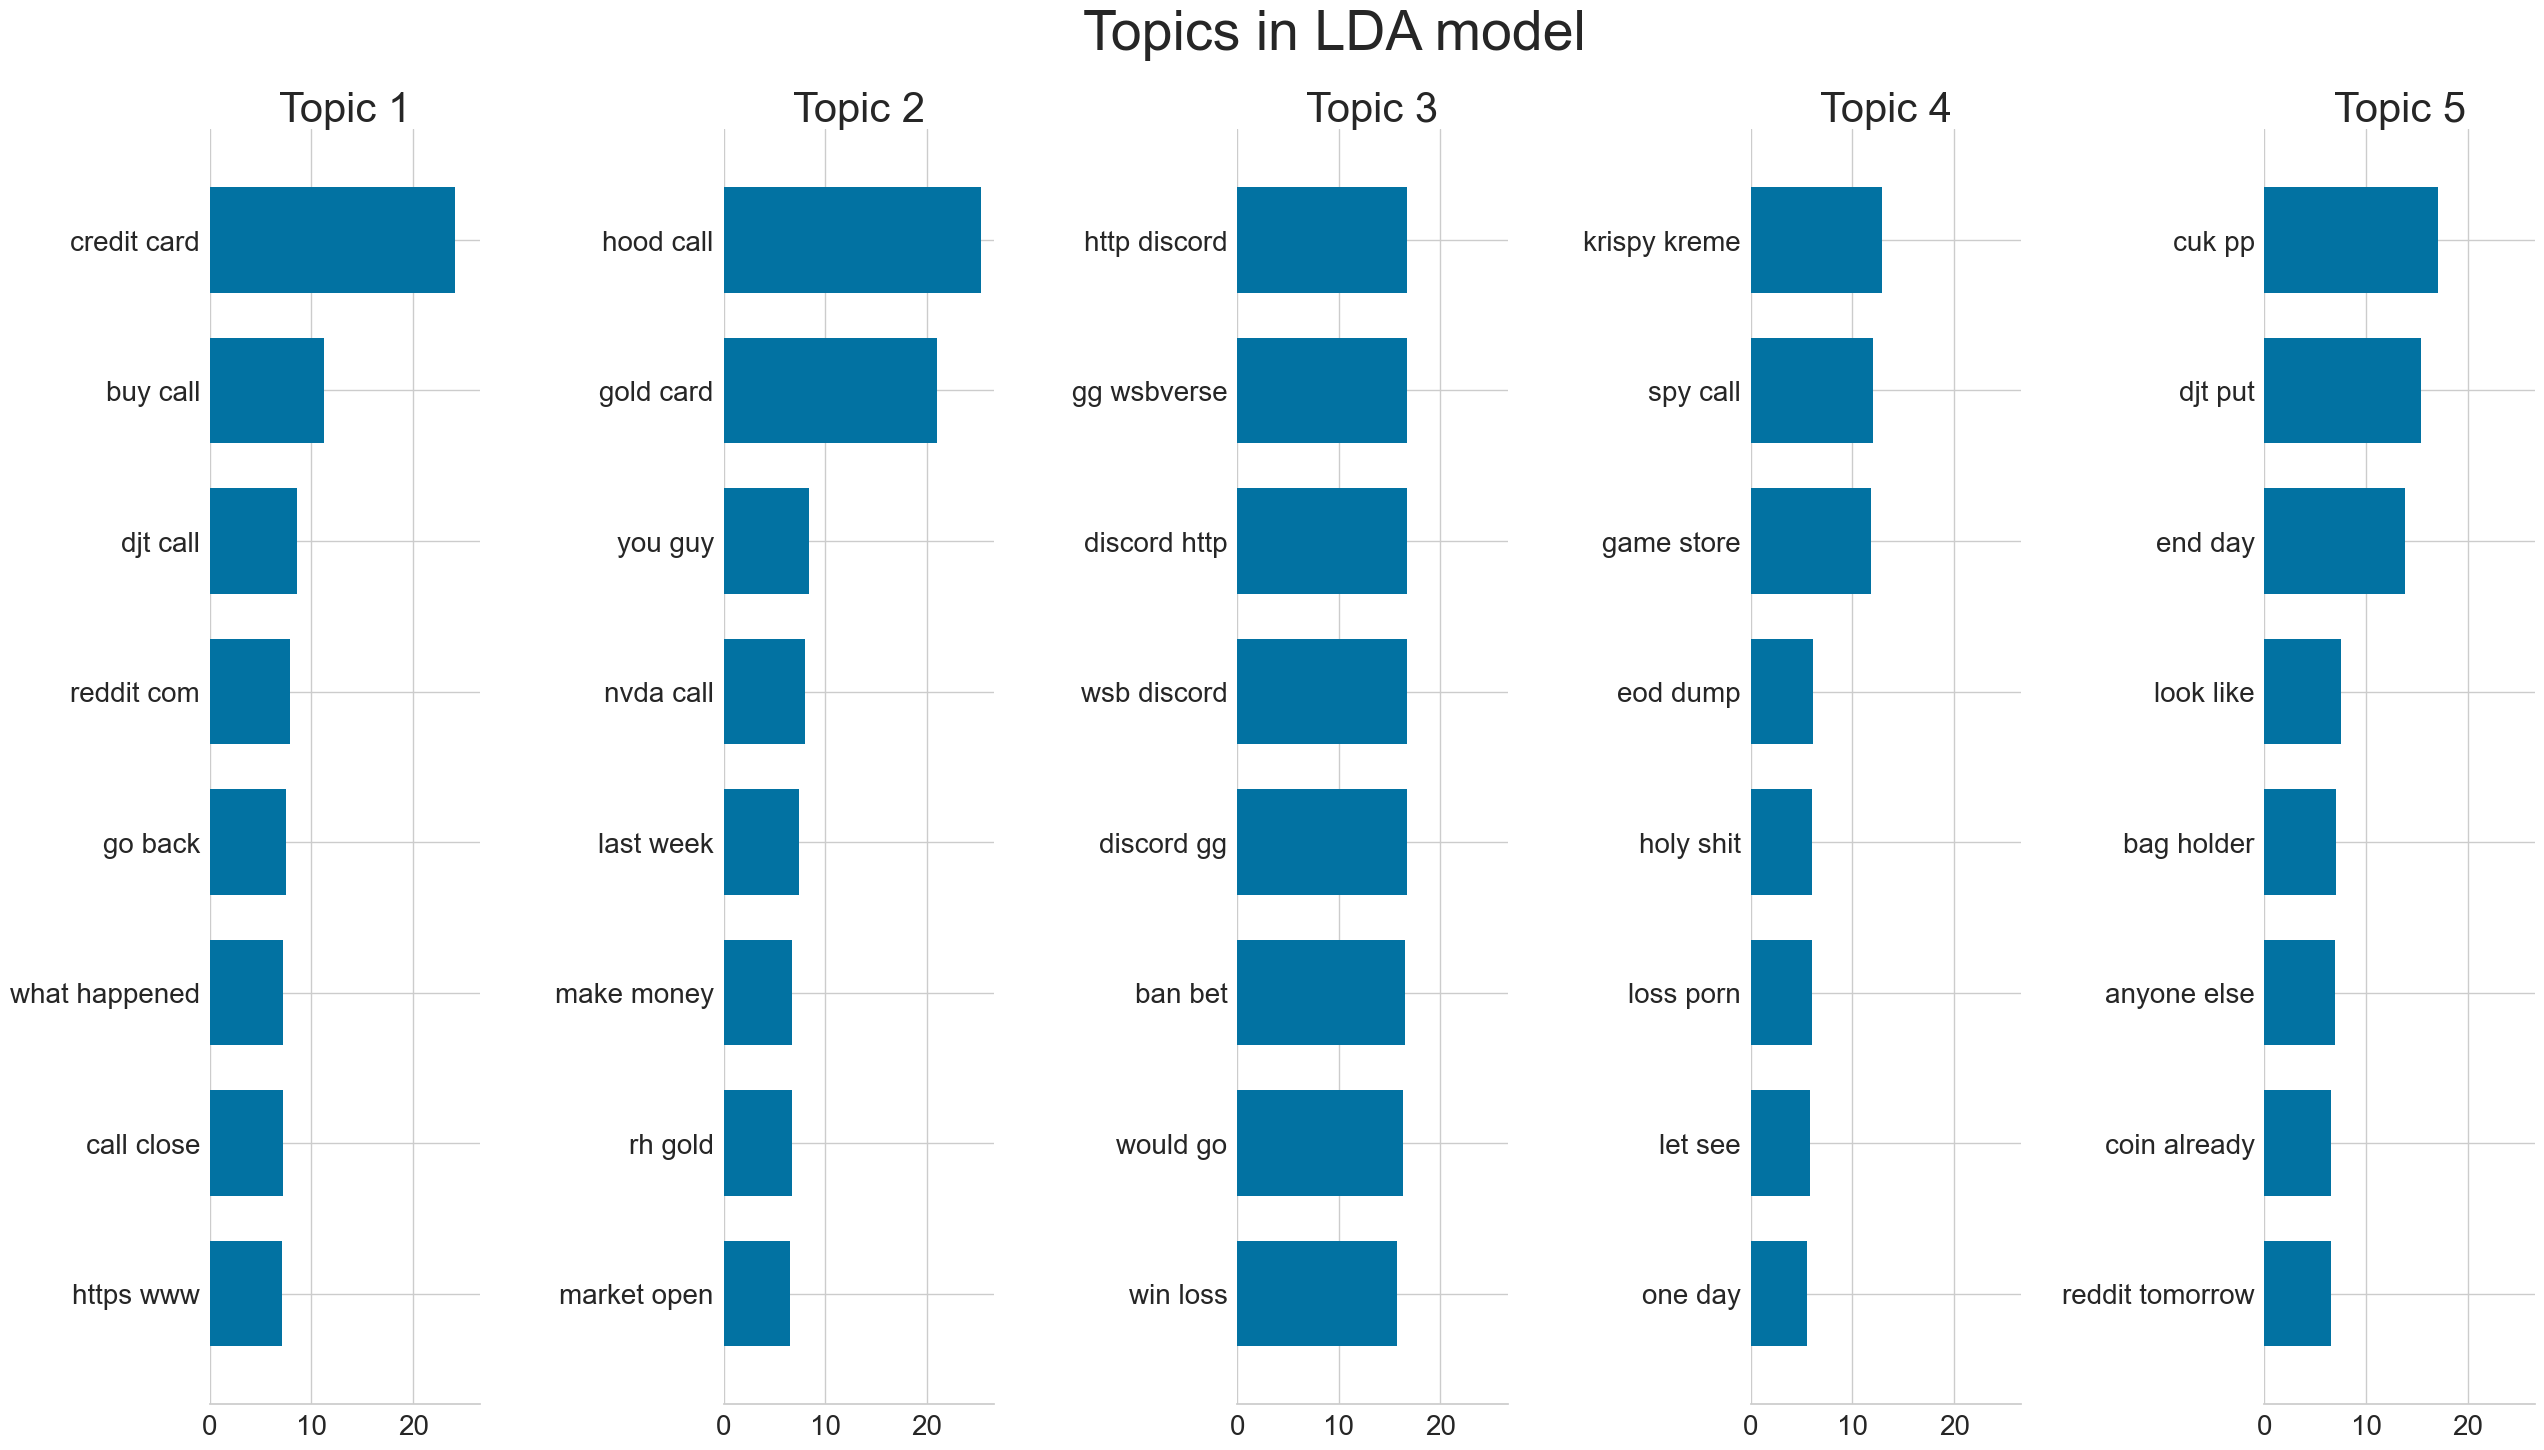

In [30]:
import matplotlib.pyplot as plt
from time import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_samples = 3000
n_features = 2000 
n_components = 5 # number of topics
n_top_words = 8  # number of topic words

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(2,2))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

done in 0.525s.


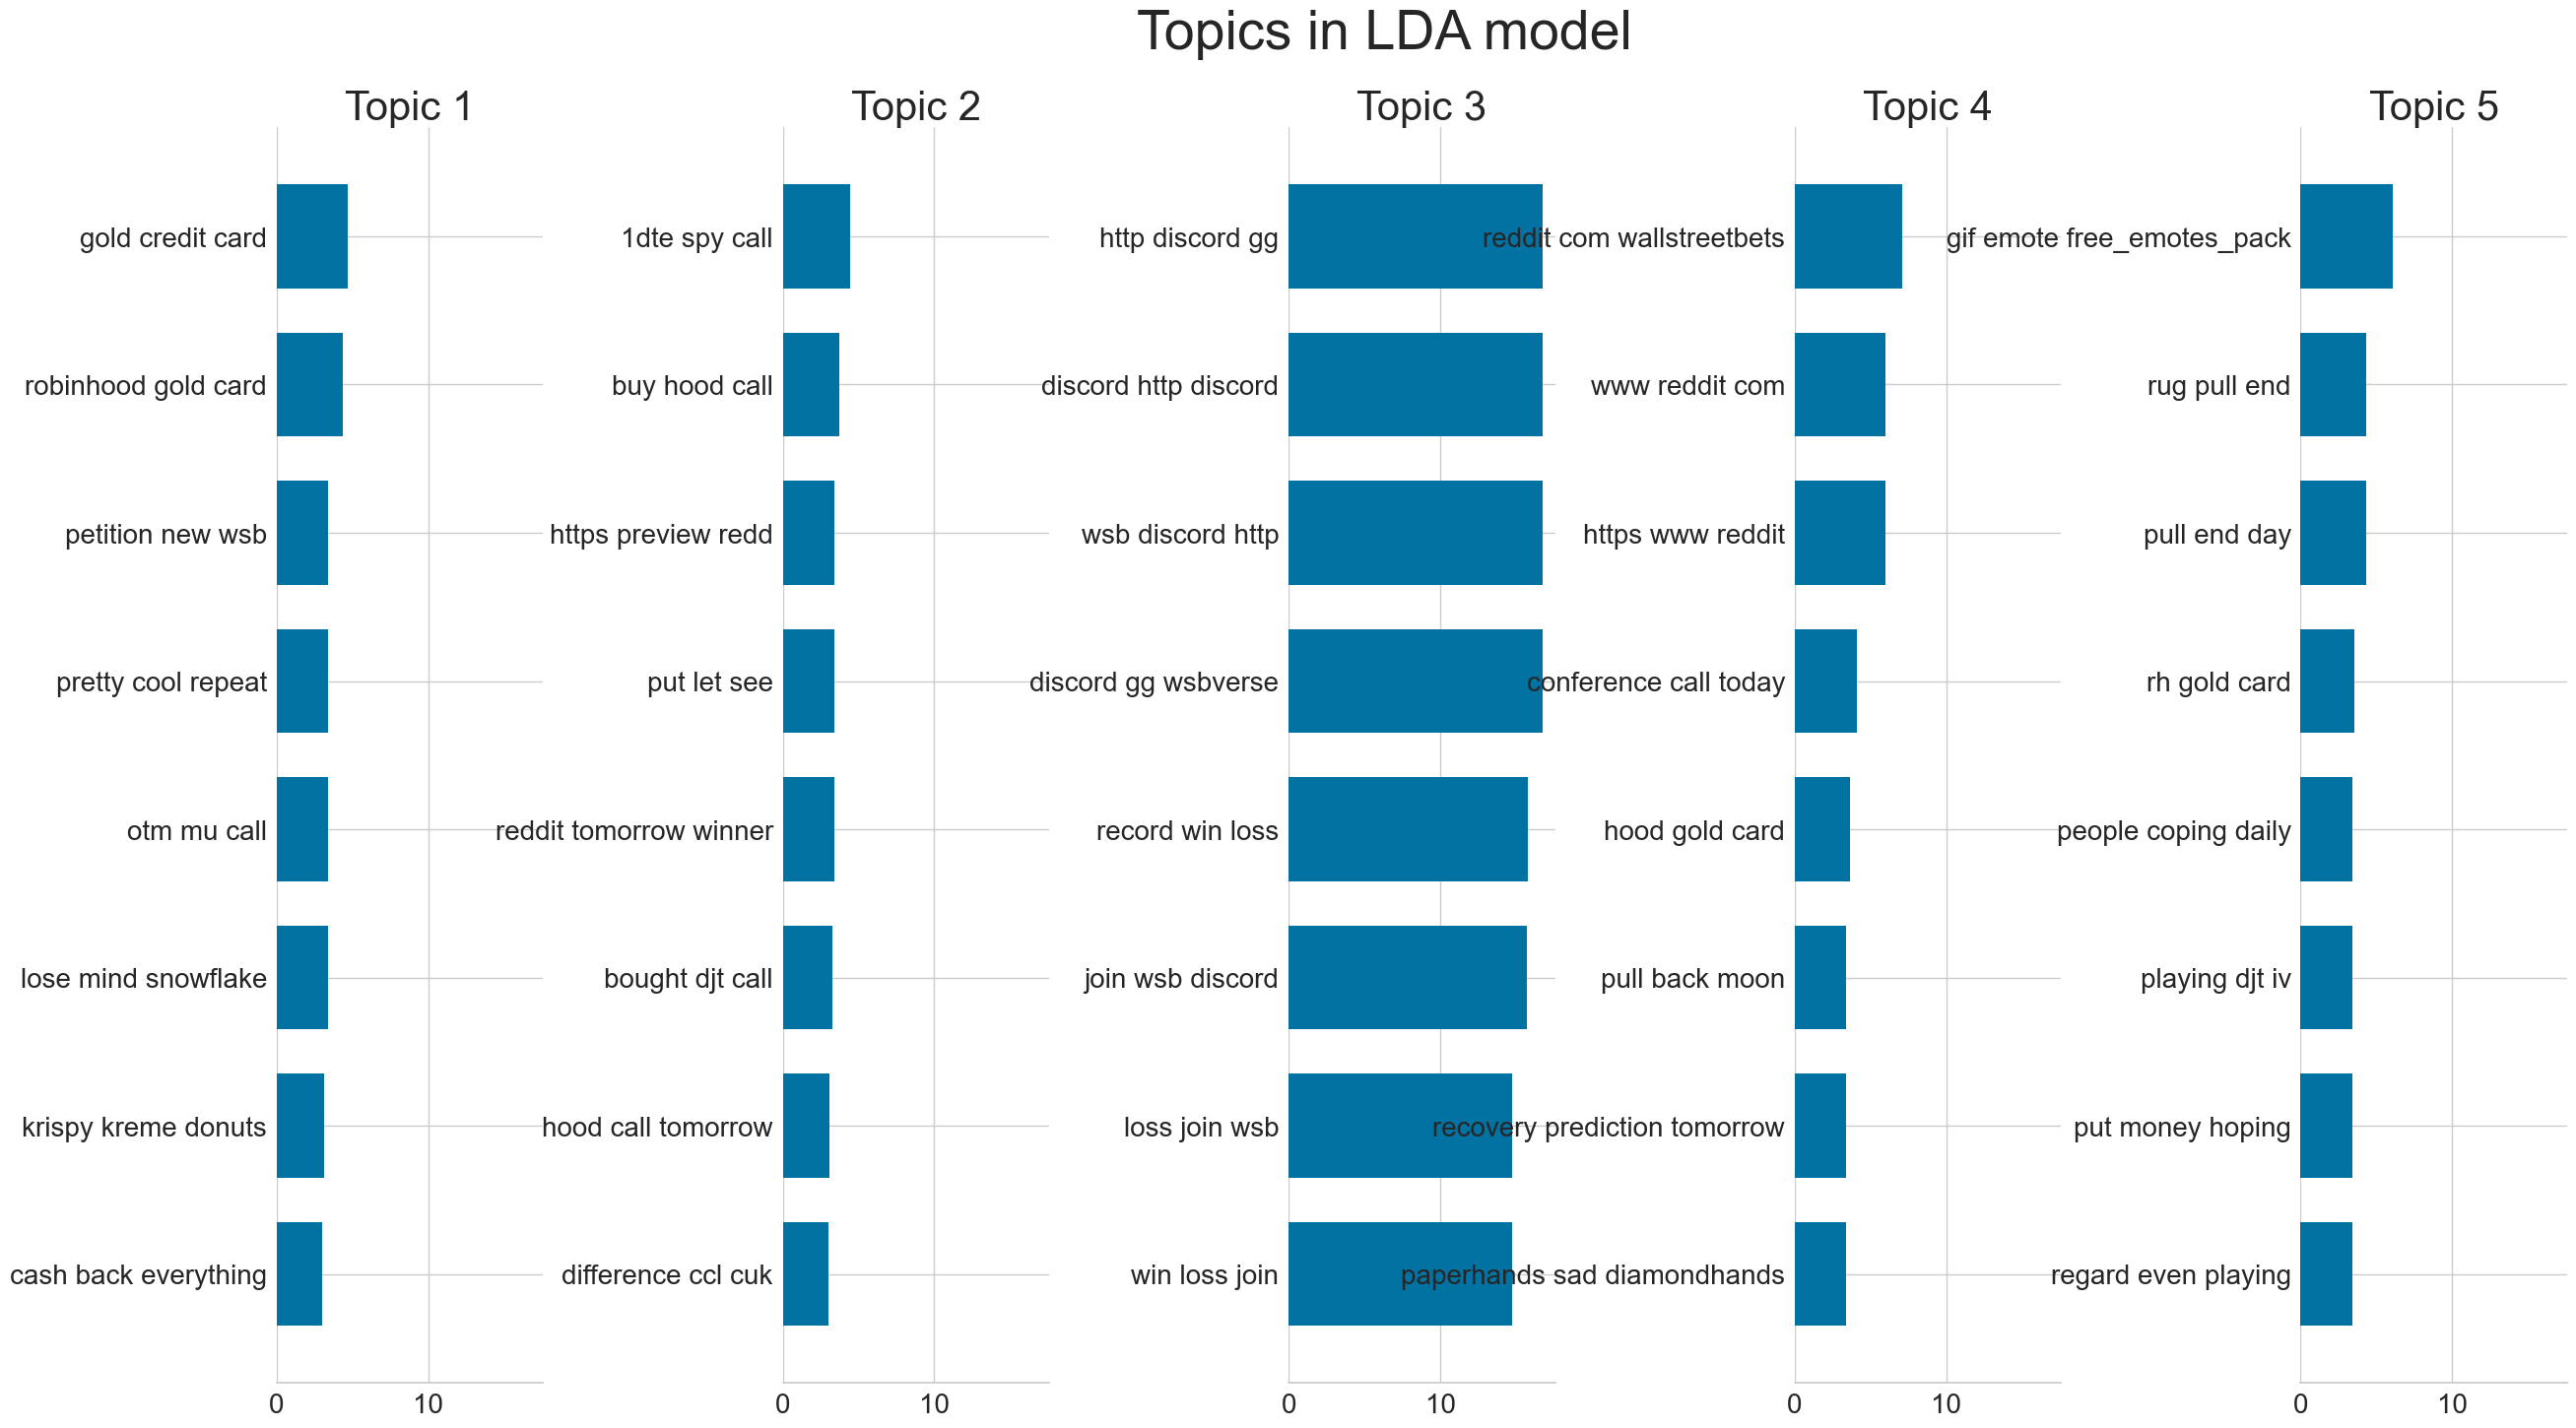

In [31]:
# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(3,3))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

# Study #1
## God 

In [32]:
# We first create a submission object
url = "https://www.reddit.com/r/AskReddit/comments/pdml00/why_do_you_believe_that_god_exists_or_doesnt_exist/"
submission = reddit.submission(url=url)

In [33]:
document=[]
submission.comments.replace_more(limit=100)
for top_level_comment in submission.comments:
        document.append(top_level_comment.body)

In [34]:
document

['Live a good life. If there are gods and they are just, then they will not care how devout you have been, but will welcome you based on the virtues you have lived by. If there are gods, but unjust, then you should not want to worship them. If there are no gods, then you will be gone, but will have lived a noble life that will live on in the memories of your loved ones.\n\n- Marcus Aurelius',
 "I don't fucking know ill find out when I die",
 'Well, one thing I know for sure is, if he exists, he is not a bearded old white dude sitting on a cloud in a toga, directing our lives.',
 "I'm agnostic now, but I used to believe in God. As I got older and realized how shitty the world was, I started questioning how an all-loving, all-powerful being could allow so many people to suffer, and when my religious authorities couldn't provide any meaningful answers, that was it for me.  \n\n\nI haven't entirely written off the idea of there being some kind of god/creator, and I won't until somebody fin

In [35]:
#Let's put this into a dataframe
author=[]
submission.comments.replace_more(limit=5)
for top_level_comment in submission.comments:
        author.append(top_level_comment.author)

import pandas as pd

df = pd.DataFrame(list(zip(author, document)),
               columns =['Author', 'Comment'])

In [36]:
df

Author                                            Comment
0               blargney  Live a good life. If there are gods and they a...
1                Vexonte       I don't fucking know ill find out when I die
2         CaptainCanguru  Well, one thing I know for sure is, if he exis...
3    DisposableAccount94  I'm agnostic now, but I used to believe in God...
4              TonyPinga  I don’t know of any credible evidence that God...
..                   ...                                                ...
946             Flyweird  First of all, God is a humanly creation. Creat...
947    TheOceanOfRainbow  I think COVID-19 had a profound impact on how ...
948              KoushKo  I think there must be, because there is no jus...
949    Alucardthegreat76  My view is if God watches you suffer and ignor...
950    Alucardthegreat76  I have been trying to believe in God for years...

[951 rows x 2 columns]

In [37]:
# Save dataframe in csv format to computer

df.to_csv('praw_output_god.csv')

In [38]:
display(df)

Author                                            Comment
0               blargney  Live a good life. If there are gods and they a...
1                Vexonte       I don't fucking know ill find out when I die
2         CaptainCanguru  Well, one thing I know for sure is, if he exis...
3    DisposableAccount94  I'm agnostic now, but I used to believe in God...
4              TonyPinga  I don’t know of any credible evidence that God...
..                   ...                                                ...
946             Flyweird  First of all, God is a humanly creation. Creat...
947    TheOceanOfRainbow  I think COVID-19 had a profound impact on how ...
948              KoushKo  I think there must be, because there is no jus...
949    Alucardthegreat76  My view is if God watches you suffer and ignor...
950    Alucardthegreat76  I have been trying to believe in God for years...

[951 rows x 2 columns]

In [39]:
# we will pick one of the rows as our example sentence for the following demonstrations.
example = df['Comment'].to_string()
type(example)

str

In [40]:
# Import python library truecase, check to see if it is already installed, if not, install and load
try:
    import truecase
except ImportError:
    %pip install truecase
    import truecase

In [41]:
print(truecase.get_true_case(example))

0 live a good life . If there are gods and they a...1 I don't Fucking know ill find out when I die 2 well, one thing I know for sure is, if he Exis...3 I'm Agnostic now, but I used to believe in God...4 I don ’ t know of any credible evidence that God...5 I'm Agnostic...I think if God exists, they do...6 to paraphrase Ricky Gervais . I thought the Arg...7 no . because you can't explain the Unexplainabl...8 not believing in God feels exactly the same as...9 I believe there's a thing but not really a per...10 simply put...\N\Na God, and their ensuing Powe...11 there are so many Relgions with a God or many...12 go visit a children's hospital . innocent child...13 I watched an interview with Neil Degrasse Tyso...14 logical skepticism, critical thinking, and und...15 I don't care if God does or does not exist, I'...16 PSA: whether you do or don't believe, I'm call...17 honestly I ’ m not sure, going to Catholic Schoo...18 I choose to believe in God, because it gives M...19 the only God in t

In [42]:
import re
clean_example = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", example)
clean_example = re.sub(r"\W+", " ", clean_example)
clean_example

'0 Live a good life If there are gods and they a 1 I don t fucking know ill find out when I die 2 Well one thing I know for sure is if he exis 3 I m agnostic now but I used to believe in God 4 I don t know of any credible evidence that God 5 I m agnostic I think if God exists they do 6 To paraphrase Ricky Gervais I thought the arg 7 No Because you can t explain the unexplainabl 8 Not believing in God feels exactly the same as 9 I believe there s a thing but not really a per 10 Simply put n nA God and their ensuing powe 11 There are so many relgions with a God or many 12 Go visit a children s hospital Innocent child 13 I watched an interview with Neil deGrasse Tyso 14 Logical skepticism critical thinking and und 15 I don t care if god does or does not exist I 16 PSA whether you do or don t believe I m call 17 Honestly I m not sure going to catholic schoo 18 I choose to believe in God because it gives m 19 The only god in this world is tater tots okay 20 Religions that encompass over hal

In [43]:
tokens = word_tokenize(clean_example)
print(tokens)

['0', 'Live', 'a', 'good', 'life', 'If', 'there', 'are', 'gods', 'and', 'they', 'a', '1', 'I', 'don', 't', 'fucking', 'know', 'ill', 'find', 'out', 'when', 'I', 'die', '2', 'Well', 'one', 'thing', 'I', 'know', 'for', 'sure', 'is', 'if', 'he', 'exis', '3', 'I', 'm', 'agnostic', 'now', 'but', 'I', 'used', 'to', 'believe', 'in', 'God', '4', 'I', 'don', 't', 'know', 'of', 'any', 'credible', 'evidence', 'that', 'God', '5', 'I', 'm', 'agnostic', 'I', 'think', 'if', 'God', 'exists', 'they', 'do', '6', 'To', 'paraphrase', 'Ricky', 'Gervais', 'I', 'thought', 'the', 'arg', '7', 'No', 'Because', 'you', 'can', 't', 'explain', 'the', 'unexplainabl', '8', 'Not', 'believing', 'in', 'God', 'feels', 'exactly', 'the', 'same', 'as', '9', 'I', 'believe', 'there', 's', 'a', 'thing', 'but', 'not', 'really', 'a', 'per', '10', 'Simply', 'put', 'n', 'nA', 'God', 'and', 'their', 'ensuing', 'powe', '11', 'There', 'are', 'so', 'many', 'relgions', 'with', 'a', 'God', 'or', 'many', '12', 'Go', 'visit', 'a', 'childr

In [44]:
from nltk.util import ngrams

#2-gram example:
grams = ngrams(tokens, 2)
for gram in grams:
        print(gram)

('0', 'Live')
('Live', 'a')
('a', 'good')
('good', 'life')
('life', 'If')
('If', 'there')
('there', 'are')
('are', 'gods')
('gods', 'and')
('and', 'they')
('they', 'a')
('a', '1')
('1', 'I')
('I', 'don')
('don', 't')
('t', 'fucking')
('fucking', 'know')
('know', 'ill')
('ill', 'find')
('find', 'out')
('out', 'when')
('when', 'I')
('I', 'die')
('die', '2')
('2', 'Well')
('Well', 'one')
('one', 'thing')
('thing', 'I')
('I', 'know')
('know', 'for')
('for', 'sure')
('sure', 'is')
('is', 'if')
('if', 'he')
('he', 'exis')
('exis', '3')
('3', 'I')
('I', 'm')
('m', 'agnostic')
('agnostic', 'now')
('now', 'but')
('but', 'I')
('I', 'used')
('used', 'to')
('to', 'believe')
('believe', 'in')
('in', 'God')
('God', '4')
('4', 'I')
('I', 'don')
('don', 't')
('t', 'know')
('know', 'of')
('of', 'any')
('any', 'credible')
('credible', 'evidence')
('evidence', 'that')
('that', 'God')
('God', '5')
('5', 'I')
('I', 'm')
('m', 'agnostic')
('agnostic', 'I')
('I', 'think')
('think', 'if')
('if', 'God')
('God'

In [45]:
#3-gram example:
grams = ngrams(tokens, 3)
for gram in grams:
        print(gram)

('0', 'Live', 'a')
('Live', 'a', 'good')
('a', 'good', 'life')
('good', 'life', 'If')
('life', 'If', 'there')
('If', 'there', 'are')
('there', 'are', 'gods')
('are', 'gods', 'and')
('gods', 'and', 'they')
('and', 'they', 'a')
('they', 'a', '1')
('a', '1', 'I')
('1', 'I', 'don')
('I', 'don', 't')
('don', 't', 'fucking')
('t', 'fucking', 'know')
('fucking', 'know', 'ill')
('know', 'ill', 'find')
('ill', 'find', 'out')
('find', 'out', 'when')
('out', 'when', 'I')
('when', 'I', 'die')
('I', 'die', '2')
('die', '2', 'Well')
('2', 'Well', 'one')
('Well', 'one', 'thing')
('one', 'thing', 'I')
('thing', 'I', 'know')
('I', 'know', 'for')
('know', 'for', 'sure')
('for', 'sure', 'is')
('sure', 'is', 'if')
('is', 'if', 'he')
('if', 'he', 'exis')
('he', 'exis', '3')
('exis', '3', 'I')
('3', 'I', 'm')
('I', 'm', 'agnostic')
('m', 'agnostic', 'now')
('agnostic', 'now', 'but')
('now', 'but', 'I')
('but', 'I', 'used')
('I', 'used', 'to')
('used', 'to', 'believe')
('to', 'believe', 'in')
('believe', 'in

In [46]:
nltk.download("stopwords") # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.corpus import stopwords

clean_tokens = nltk.word_tokenize(clean_example)
filtered_words = [word for word in clean_tokens if word not in stopwords.words('english')]
filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tcliu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['0',
 'Live',
 'good',
 'life',
 'If',
 'gods',
 '1',
 'I',
 'fucking',
 'know',
 'ill',
 'find',
 'I',
 'die',
 '2',
 'Well',
 'one',
 'thing',
 'I',
 'know',
 'sure',
 'exis',
 '3',
 'I',
 'agnostic',
 'I',
 'used',
 'believe',
 'God',
 '4',
 'I',
 'know',
 'credible',
 'evidence',
 'God',
 '5',
 'I',
 'agnostic',
 'I',
 'think',
 'God',
 'exists',
 '6',
 'To',
 'paraphrase',
 'Ricky',
 'Gervais',
 'I',
 'thought',
 'arg',
 '7',
 'No',
 'Because',
 'explain',
 'unexplainabl',
 '8',
 'Not',
 'believing',
 'God',
 'feels',
 'exactly',
 '9',
 'I',
 'believe',
 'thing',
 'really',
 'per',
 '10',
 'Simply',
 'put',
 'n',
 'nA',
 'God',
 'ensuing',
 'powe',
 '11',
 'There',
 'many',
 'relgions',
 'God',
 'many',
 '12',
 'Go',
 'visit',
 'children',
 'hospital',
 'Innocent',
 'child',
 '13',
 'I',
 'watched',
 'interview',
 'Neil',
 'deGrasse',
 'Tyso',
 '14',
 'Logical',
 'skepticism',
 'critical',
 'thinking',
 'und',
 '15',
 'I',
 'care',
 'god',
 'exist',
 'I',
 '16',
 'PSA',
 'whether

In [47]:
nltk.download('wordnet') # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.stem.porter import PorterStemmer
porter = [PorterStemmer().stem(word) for word in filtered_words]
porter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tcliu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['0',
 'live',
 'good',
 'life',
 'if',
 'god',
 '1',
 'i',
 'fuck',
 'know',
 'ill',
 'find',
 'i',
 'die',
 '2',
 'well',
 'one',
 'thing',
 'i',
 'know',
 'sure',
 'exi',
 '3',
 'i',
 'agnost',
 'i',
 'use',
 'believ',
 'god',
 '4',
 'i',
 'know',
 'credibl',
 'evid',
 'god',
 '5',
 'i',
 'agnost',
 'i',
 'think',
 'god',
 'exist',
 '6',
 'to',
 'paraphras',
 'ricki',
 'gervai',
 'i',
 'thought',
 'arg',
 '7',
 'no',
 'becaus',
 'explain',
 'unexplainabl',
 '8',
 'not',
 'believ',
 'god',
 'feel',
 'exactli',
 '9',
 'i',
 'believ',
 'thing',
 'realli',
 'per',
 '10',
 'simpli',
 'put',
 'n',
 'na',
 'god',
 'ensu',
 'pow',
 '11',
 'there',
 'mani',
 'relgion',
 'god',
 'mani',
 '12',
 'go',
 'visit',
 'children',
 'hospit',
 'innoc',
 'child',
 '13',
 'i',
 'watch',
 'interview',
 'neil',
 'degrass',
 'tyso',
 '14',
 'logic',
 'skeptic',
 'critic',
 'think',
 'und',
 '15',
 'i',
 'care',
 'god',
 'exist',
 'i',
 '16',
 'psa',
 'whether',
 'believ',
 'i',
 'call',
 '17',
 'honestli',

In [48]:
from nltk.stem import WordNetLemmatizer
wordnet = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]
wordnet

['0',
 'Live',
 'good',
 'life',
 'If',
 'god',
 '1',
 'I',
 'fucking',
 'know',
 'ill',
 'find',
 'I',
 'die',
 '2',
 'Well',
 'one',
 'thing',
 'I',
 'know',
 'sure',
 'exis',
 '3',
 'I',
 'agnostic',
 'I',
 'used',
 'believe',
 'God',
 '4',
 'I',
 'know',
 'credible',
 'evidence',
 'God',
 '5',
 'I',
 'agnostic',
 'I',
 'think',
 'God',
 'exists',
 '6',
 'To',
 'paraphrase',
 'Ricky',
 'Gervais',
 'I',
 'thought',
 'arg',
 '7',
 'No',
 'Because',
 'explain',
 'unexplainabl',
 '8',
 'Not',
 'believing',
 'God',
 'feel',
 'exactly',
 '9',
 'I',
 'believe',
 'thing',
 'really',
 'per',
 '10',
 'Simply',
 'put',
 'n',
 'nA',
 'God',
 'ensuing',
 'powe',
 '11',
 'There',
 'many',
 'relgions',
 'God',
 'many',
 '12',
 'Go',
 'visit',
 'child',
 'hospital',
 'Innocent',
 'child',
 '13',
 'I',
 'watched',
 'interview',
 'Neil',
 'deGrasse',
 'Tyso',
 '14',
 'Logical',
 'skepticism',
 'critical',
 'thinking',
 'und',
 '15',
 'I',
 'care',
 'god',
 'exist',
 'I',
 '16',
 'PSA',
 'whether',
 '

In [49]:
# Running it through preprocessing
import nltk
import truecase
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def preprocess(x):
    # Remove unwanted characters
    x = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", x)
    x = re.sub(r"\W+", " ", x)
    
    # Truecase
    x = truecase.get_true_case(x)
    
    #Remove stopwards and lemmatize
    x = [WordNetLemmatizer().lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

df['clean'] = df['Comment'].apply(preprocess)
df['length'] = df['clean'].apply(len) # to add a new column for wordcount

display(df)

Author                                            Comment  \
0               blargney  Live a good life. If there are gods and they a...   
1                Vexonte       I don't fucking know ill find out when I die   
2         CaptainCanguru  Well, one thing I know for sure is, if he exis...   
3    DisposableAccount94  I'm agnostic now, but I used to believe in God...   
4              TonyPinga  I don’t know of any credible evidence that God...   
..                   ...                                                ...   
946             Flyweird  First of all, God is a humanly creation. Creat...   
947    TheOceanOfRainbow  I think COVID-19 had a profound impact on how ...   
948              KoushKo  I think there must be, because there is no jus...   
949    Alucardthegreat76  My view is if God watches you suffer and ignor...   
950    Alucardthegreat76  I have been trying to believe in God for years...   

                                                 clean  length  
0    Live good life god care devout welcome based v...     145  
1                        I Fucking know ill find I die      29  
2    Well one thing I know sure exists bearded old ...      90  
3    I M Agnostic I used believe God I got older re...     312  
4    I know credible evidence God exists evidence p...      68  
..                                                 ...     ...  
946  First God humanly creation created explain une...     465  
947  I think Covid 19 profound impact I think God r...    2020  
948  I think must justice world good people die cri...      75  
949  My view God watch suffer ignores die ask done ...     969  
950  I trying believe God year much hell difficult ...     494  

[951 rows x 4 columns]

In [50]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [51]:
from textblob import TextBlob

df['sentiment'] = df['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [52]:
display(df)

Author                                            Comment  \
0               blargney  Live a good life. If there are gods and they a...   
1                Vexonte       I don't fucking know ill find out when I die   
2         CaptainCanguru  Well, one thing I know for sure is, if he exis...   
3    DisposableAccount94  I'm agnostic now, but I used to believe in God...   
4              TonyPinga  I don’t know of any credible evidence that God...   
..                   ...                                                ...   
946             Flyweird  First of all, God is a humanly creation. Creat...   
947    TheOceanOfRainbow  I think COVID-19 had a profound impact on how ...   
948              KoushKo  I think there must be, because there is no jus...   
949    Alucardthegreat76  My view is if God watches you suffer and ignor...   
950    Alucardthegreat76  I have been trying to believe in God for years...   

                                                 clean  length  sentiment  
0    Live good life god care devout welcome based v...     145   0.512121  
1                        I Fucking know ill find I die      29  -0.550000  
2    Well one thing I know sure exists bearded old ...      90   0.200000  
3    I M Agnostic I used believe God I got older re...     312   0.251852  
4    I know credible evidence God exists evidence p...      68   0.400000  
..                                                 ...     ...        ...  
946  First God humanly creation created explain une...     465   0.216667  
947  I think Covid 19 profound impact I think God r...    2020   0.040894  
948  I think must justice world good people die cri...      75  -0.233333  
949  My view God watch suffer ignores die ask done ...     969   0.016119  
950  I trying believe God year much hell difficult ...     494  -0.020996  

[951 rows x 5 columns]

In [53]:
# Import python library yellowbrick, check to see if it is already installed, if not, install and load
try:
    from yellowbrick.text import FreqDistVisualizer
    from yellowbrick.datasets import load_hobbies
except ImportError:
    %pip install yellowbrick
    from yellowbrick.text import FreqDistVisualizer
    from yellowbrick.datasets import load_hobbies

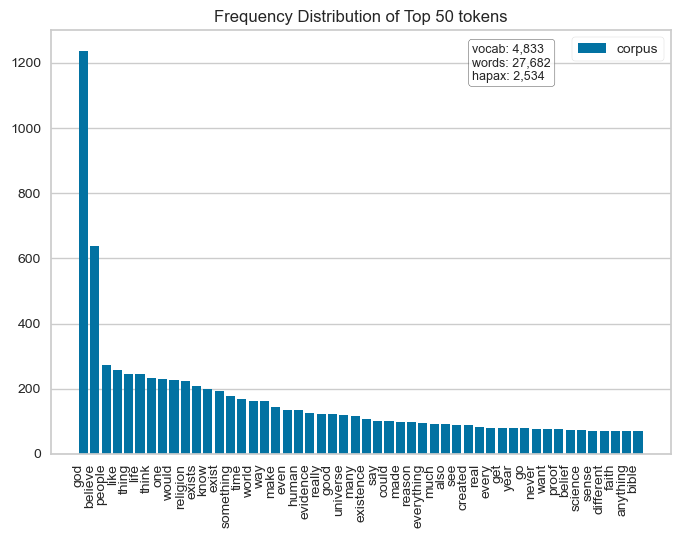

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [54]:
from sklearn.feature_extraction.text import CountVectorizer


# default is 1-gram
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

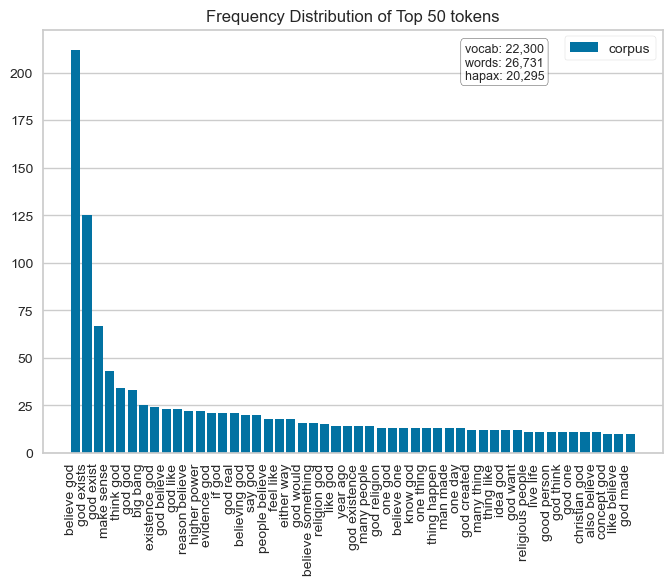

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [55]:
# Let's try 2-grams
vectorizer = CountVectorizer(ngram_range=(2,2))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

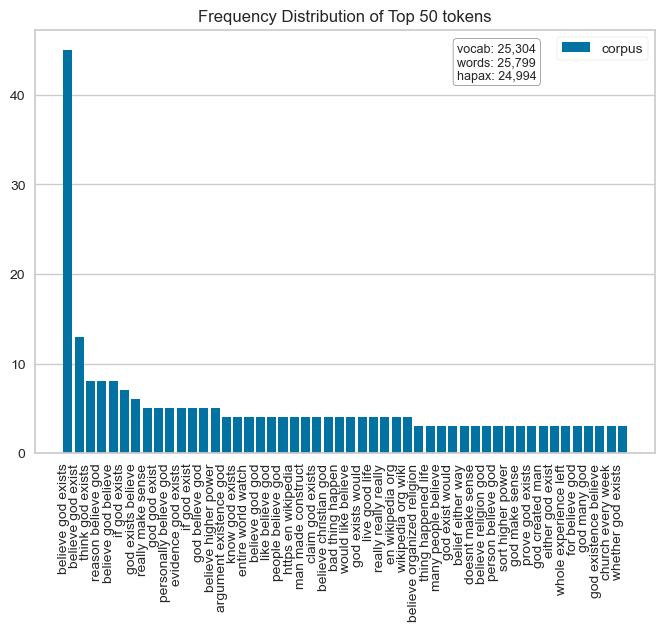

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [56]:
# Let's try 3-grams
vectorizer = CountVectorizer(ngram_range=(3,3))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

done in 0.463s.


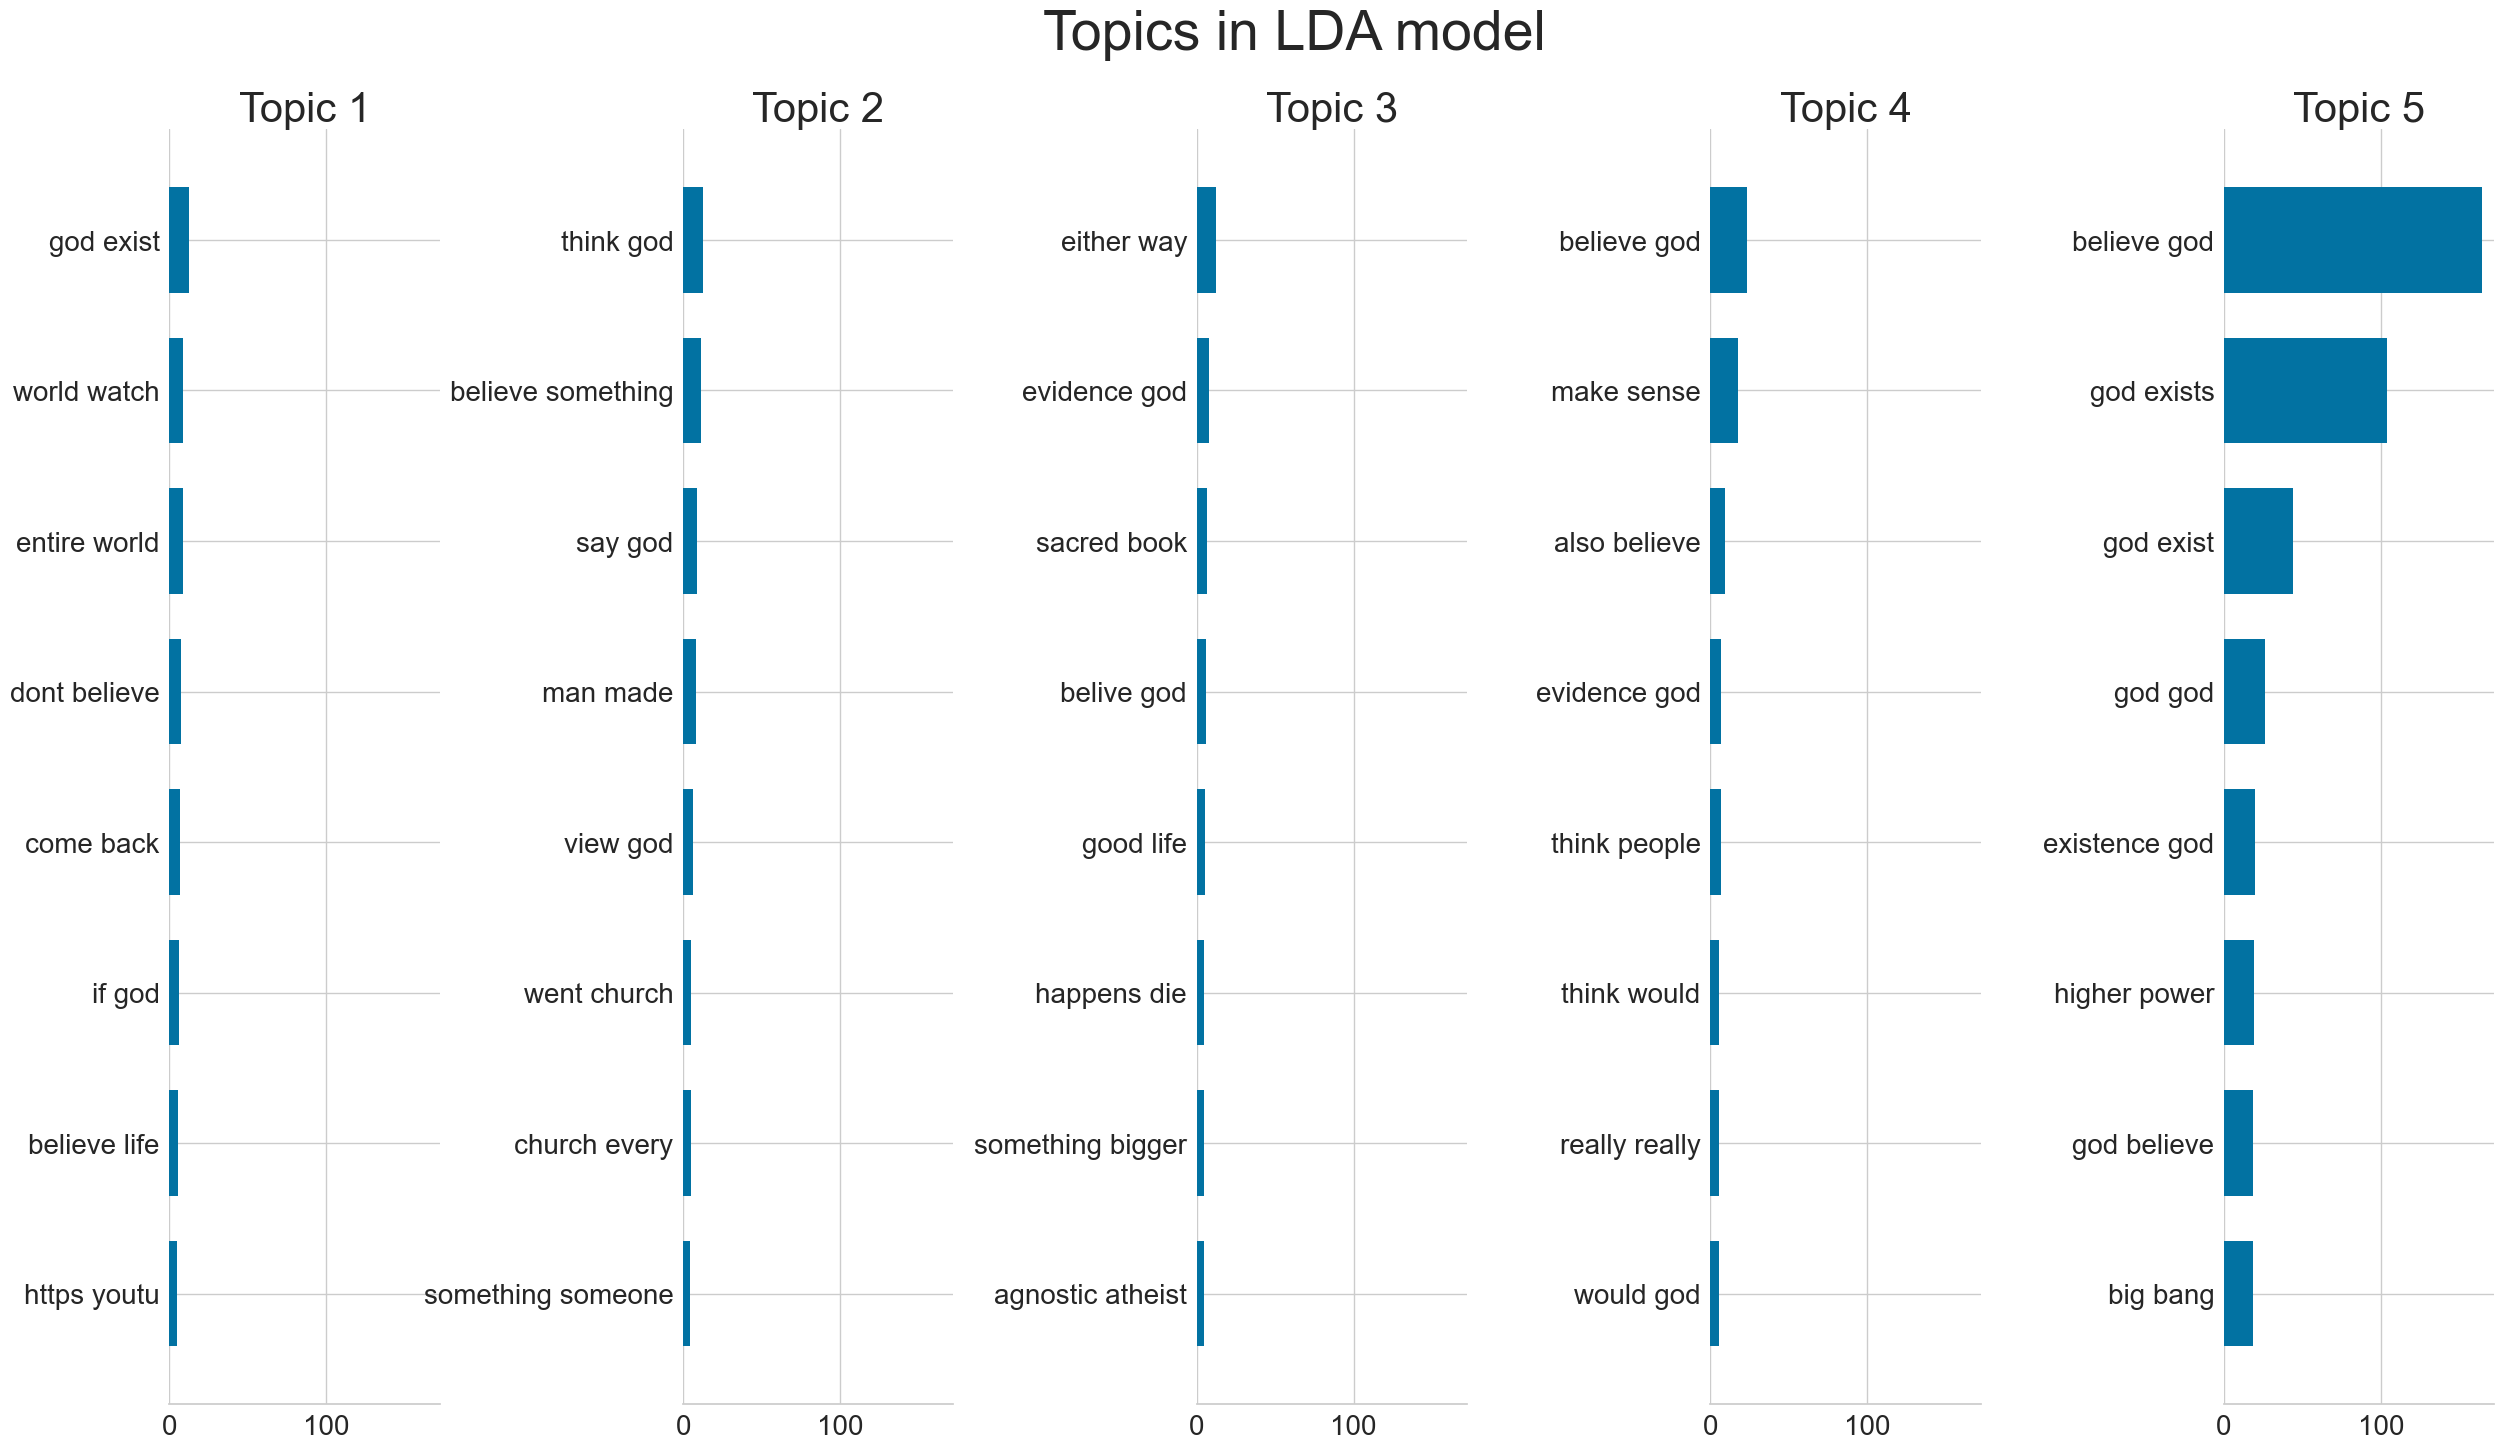

In [57]:
import matplotlib.pyplot as plt
from time import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_samples = 3000
n_features = 2000 
n_components = 5 # number of topics
n_top_words = 8  # number of topic words

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(2,2))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

done in 0.303s.


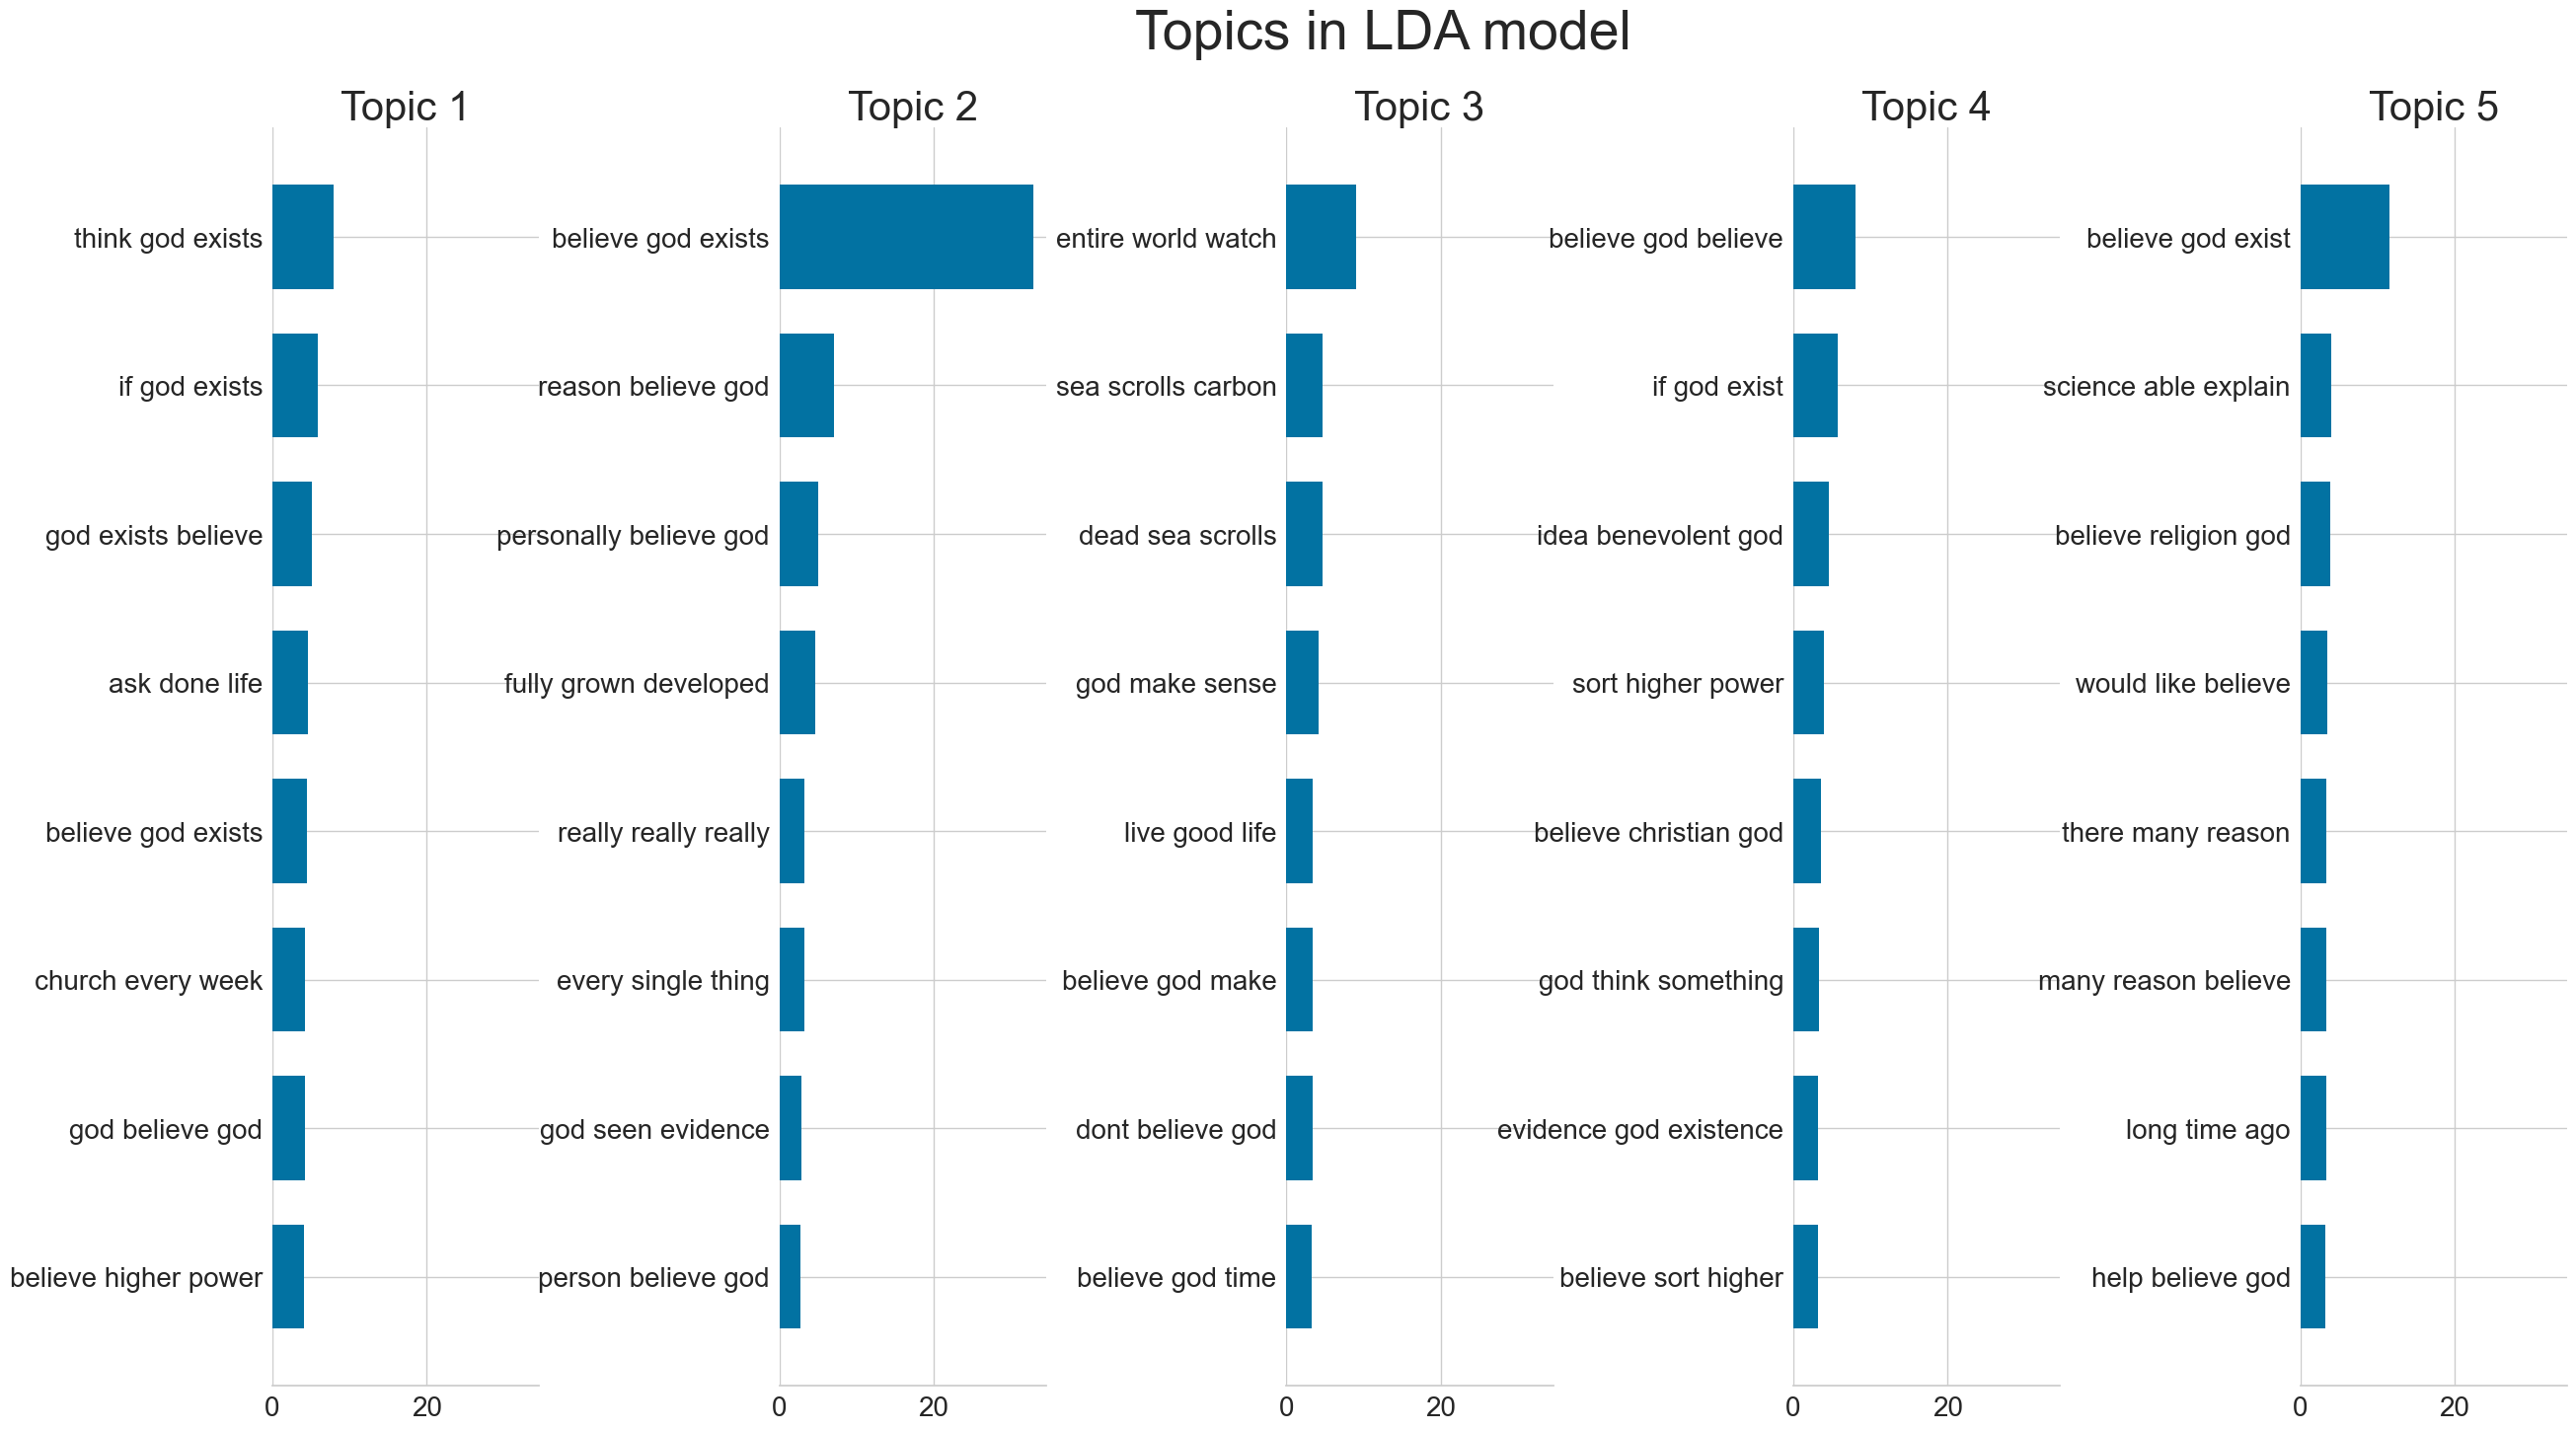

In [58]:
# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(3,3))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

# Study #2
## The Ethics of Abortion

In [59]:
url = "https://www.reddit.com/r/philosophy/comments/4c2i2c/the_ethics_of_abortion_1000_word_philosophy/"
submission = reddit.submission(url=url)

In [60]:
document=[]
submission.comments.replace_more(limit=100)
for top_level_comment in submission.comments:
        document.append(top_level_comment.body)

In [61]:
#Let's put this into a dataframe
author=[]
submission.comments.replace_more(limit=5)
for top_level_comment in submission.comments:
        author.append(top_level_comment.author)

import pandas as pd

df = pd.DataFrame(list(zip(author, document)),
               columns =['Author', 'Comment'])

In [62]:
# Save dataframe in csv format to computer

df.to_csv('praw_output_abortion.csv')

In [63]:
# we will pick one of the rows as our example sentence for the following demonstrations.
example = df['Comment'].to_string()
type(example)

str

In [64]:
import re
clean_example = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", example)
clean_example = re.sub(r"\W+", " ", clean_example)
clean_example

'0 Am I right in thinking that the morality of ab 1 I have never heard a good argument for why fet 2 If I must use your kidney to stay alive do 3 Almost all times I read an American influenced 4 Personally I think the SCC hit it perfectly T 5 This was without doubt written by someone wh 6 To me it comes down to bodily sovereignty No 7 I have read once that a fetus develops neocort 8 Here s my position on abortion If the fetus w 9 I think it s important to remember that whethe 10 There are 2 premise from which to work on n 11 Really needed this have to do a presentation 12 Not necessarily Judith Thompson famously ar 13 It is wrong to kill us arguably because kil 14 I believe that whether it is considered life 15 It seems silly to call a fetus a human life as 16 deleted 17 deleted 18 I come into the abortion question with the ass 19 deleted 20 Judith Thompson famously argued in her 1971 21 It seems like many people are not talking abou 22 removed 23 removed 24 I just listened to the Radi

In [65]:
tokens = word_tokenize(clean_example)
print(tokens)

['0', 'Am', 'I', 'right', 'in', 'thinking', 'that', 'the', 'morality', 'of', 'ab', '1', 'I', 'have', 'never', 'heard', 'a', 'good', 'argument', 'for', 'why', 'fet', '2', 'If', 'I', 'must', 'use', 'your', 'kidney', 'to', 'stay', 'alive', 'do', '3', 'Almost', 'all', 'times', 'I', 'read', 'an', 'American', 'influenced', '4', 'Personally', 'I', 'think', 'the', 'SCC', 'hit', 'it', 'perfectly', 'T', '5', 'This', 'was', 'without', 'doubt', 'written', 'by', 'someone', 'wh', '6', 'To', 'me', 'it', 'comes', 'down', 'to', 'bodily', 'sovereignty', 'No', '7', 'I', 'have', 'read', 'once', 'that', 'a', 'fetus', 'develops', 'neocort', '8', 'Here', 's', 'my', 'position', 'on', 'abortion', 'If', 'the', 'fetus', 'w', '9', 'I', 'think', 'it', 's', 'important', 'to', 'remember', 'that', 'whethe', '10', 'There', 'are', '2', 'premise', 'from', 'which', 'to', 'work', 'on', 'n', '11', 'Really', 'needed', 'this', 'have', 'to', 'do', 'a', 'presentation', '12', 'Not', 'necessarily', 'Judith', 'Thompson', 'famousl

In [66]:
clean_tokens = nltk.word_tokenize(clean_example)
filtered_words = [word for word in clean_tokens if word not in stopwords.words('english')]
filtered_words

['0',
 'Am',
 'I',
 'right',
 'thinking',
 'morality',
 'ab',
 '1',
 'I',
 'never',
 'heard',
 'good',
 'argument',
 'fet',
 '2',
 'If',
 'I',
 'must',
 'use',
 'kidney',
 'stay',
 'alive',
 '3',
 'Almost',
 'times',
 'I',
 'read',
 'American',
 'influenced',
 '4',
 'Personally',
 'I',
 'think',
 'SCC',
 'hit',
 'perfectly',
 'T',
 '5',
 'This',
 'without',
 'doubt',
 'written',
 'someone',
 'wh',
 '6',
 'To',
 'comes',
 'bodily',
 'sovereignty',
 'No',
 '7',
 'I',
 'read',
 'fetus',
 'develops',
 'neocort',
 '8',
 'Here',
 'position',
 'abortion',
 'If',
 'fetus',
 'w',
 '9',
 'I',
 'think',
 'important',
 'remember',
 'whethe',
 '10',
 'There',
 '2',
 'premise',
 'work',
 'n',
 '11',
 'Really',
 'needed',
 'presentation',
 '12',
 'Not',
 'necessarily',
 'Judith',
 'Thompson',
 'famously',
 'ar',
 '13',
 'It',
 'wrong',
 'kill',
 'us',
 'arguably',
 'kil',
 '14',
 'I',
 'believe',
 'whether',
 'considered',
 'life',
 '15',
 'It',
 'seems',
 'silly',
 'call',
 'fetus',
 'human',
 'life

In [67]:
nltk.download('wordnet') # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.stem.porter import PorterStemmer
porter = [PorterStemmer().stem(word) for word in filtered_words]
porter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tcliu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['0',
 'am',
 'i',
 'right',
 'think',
 'moral',
 'ab',
 '1',
 'i',
 'never',
 'heard',
 'good',
 'argument',
 'fet',
 '2',
 'if',
 'i',
 'must',
 'use',
 'kidney',
 'stay',
 'aliv',
 '3',
 'almost',
 'time',
 'i',
 'read',
 'american',
 'influenc',
 '4',
 'person',
 'i',
 'think',
 'scc',
 'hit',
 'perfectli',
 't',
 '5',
 'thi',
 'without',
 'doubt',
 'written',
 'someon',
 'wh',
 '6',
 'to',
 'come',
 'bodili',
 'sovereignti',
 'no',
 '7',
 'i',
 'read',
 'fetu',
 'develop',
 'neocort',
 '8',
 'here',
 'posit',
 'abort',
 'if',
 'fetu',
 'w',
 '9',
 'i',
 'think',
 'import',
 'rememb',
 'wheth',
 '10',
 'there',
 '2',
 'premis',
 'work',
 'n',
 '11',
 'realli',
 'need',
 'present',
 '12',
 'not',
 'necessarili',
 'judith',
 'thompson',
 'famous',
 'ar',
 '13',
 'it',
 'wrong',
 'kill',
 'us',
 'arguabl',
 'kil',
 '14',
 'i',
 'believ',
 'whether',
 'consid',
 'life',
 '15',
 'it',
 'seem',
 'silli',
 'call',
 'fetu',
 'human',
 'life',
 '16',
 'delet',
 '17',
 'delet',
 '18',
 'i',


In [68]:
from nltk.stem import WordNetLemmatizer
wordnet = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]
wordnet

['0',
 'Am',
 'I',
 'right',
 'thinking',
 'morality',
 'ab',
 '1',
 'I',
 'never',
 'heard',
 'good',
 'argument',
 'fet',
 '2',
 'If',
 'I',
 'must',
 'use',
 'kidney',
 'stay',
 'alive',
 '3',
 'Almost',
 'time',
 'I',
 'read',
 'American',
 'influenced',
 '4',
 'Personally',
 'I',
 'think',
 'SCC',
 'hit',
 'perfectly',
 'T',
 '5',
 'This',
 'without',
 'doubt',
 'written',
 'someone',
 'wh',
 '6',
 'To',
 'come',
 'bodily',
 'sovereignty',
 'No',
 '7',
 'I',
 'read',
 'fetus',
 'develops',
 'neocort',
 '8',
 'Here',
 'position',
 'abortion',
 'If',
 'fetus',
 'w',
 '9',
 'I',
 'think',
 'important',
 'remember',
 'whethe',
 '10',
 'There',
 '2',
 'premise',
 'work',
 'n',
 '11',
 'Really',
 'needed',
 'presentation',
 '12',
 'Not',
 'necessarily',
 'Judith',
 'Thompson',
 'famously',
 'ar',
 '13',
 'It',
 'wrong',
 'kill',
 'u',
 'arguably',
 'kil',
 '14',
 'I',
 'believe',
 'whether',
 'considered',
 'life',
 '15',
 'It',
 'seems',
 'silly',
 'call',
 'fetus',
 'human',
 'life',


In [69]:
# Running it through preprocessing
import nltk
import truecase
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def preprocess(x):
    # Remove unwanted characters
    x = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", x)
    x = re.sub(r"\W+", " ", x)
    
    # Truecase
    x = truecase.get_true_case(x)
    
    #Remove stopwards and lemmatize
    x = [WordNetLemmatizer().lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

df['clean'] = df['Comment'].apply(preprocess)
df['length'] = df['clean'].apply(len) # to add a new column for wordcount

display(df)

Author                                            Comment  \
0            uncletroll  Am I right in thinking that the morality of ab...   
1            Kentaro009  I have never heard a good argument for why fet...   
2                  None  > If I must use your kidney to stay alive, do ...   
3       This_Is_The_End  Almost all times I read an American influenced...   
4                  None  Personally I think the SCC hit it perfectly. T...   
5            thesheep88  This was, without doubt, written by someone wh...   
6          Made-a-blade  To me it comes down to bodily sovereignty. No ...   
7          AstronautApe  I have read once that a fetus develops neocort...   
8          Albino_Smurf  Here's my position on abortion: If the fetus w...   
9                scale6  I think it's important to remember that whethe...   
10           merton1111  There are 2 premise from which to work on: \n\...   
11              Heatios  Really needed this, have to do a presentation ...   
12                 None  > Not necessarily. Judith Thompson famously ar...   
13                 None  >It is wrong to kill us, arguably, because kil...   
14                 None  I believe that whether it is considered "life"...   
15           AudiHoosey  It seems silly to call a fetus a human life as...   
16                 None                                          [deleted]   
17                 None                                          [deleted]   
18       Double-Portion  I come into the abortion question with the ass...   
19                 None                                          [deleted]   
20   helpmegetgainsbros  >Judith Thompson famously argued in her 1971 “...   
21            jugenbund  It seems like many people are not talking abou...   
22                 None                                          [removed]   
23                 None                                          [removed]   
24                 None  I just listened to the Radio Lab podcast today...   
25                 None  It's just funny to me how people who love phil...   
26                 None  The article falls apart at the "kidney" argume...   
27                 None                                          [deleted]   
28             okamjojo  I was always curious as to why abortion wasnt ...   
29         jonfmalmberg  Google search "monopoly on violence". Abortion...   
30                 None                                          [removed]   
31        InfernoVulpix  A concept that has stuck with me for a while n...   
32              The-Yar  There are only two arguments of much nuance or...   
33          madmark1994  What about this? This is an argument I have ag...   
34                 None                                          [deleted]   
35                 None                                          [deleted]   
36                 None                                          [removed]   
37     ThreeSquaredRoom  To people who brush over the importance of bod...   
38                 None  This paper is what one of my college literary ...   
39                 None                                          [removed]   
40   somepersonontheweb  >While this argument is influential in some ci...   
41  Son_of_Sophroniscus                                     Nice blog, OP.   
42      GaslightProphet  >If I must use your kidney to stay alive, do I...   
43                 None                                          [deleted]   
44                 None  [Judith Thompson famously argued in her 1971 “...   
45          bigelbowski  Yall are fucked dude, this garbagio is not dra...   
46                 None                                          [removed]   
47                 None  The simple answer is found in the moral argume...   
48        537y35y5uy3wy  On the ethics of abortion:\n\nAnyone who says ...   
49                 None                                          [removed]   

                                      

In [70]:
df['sentiment'] = df['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

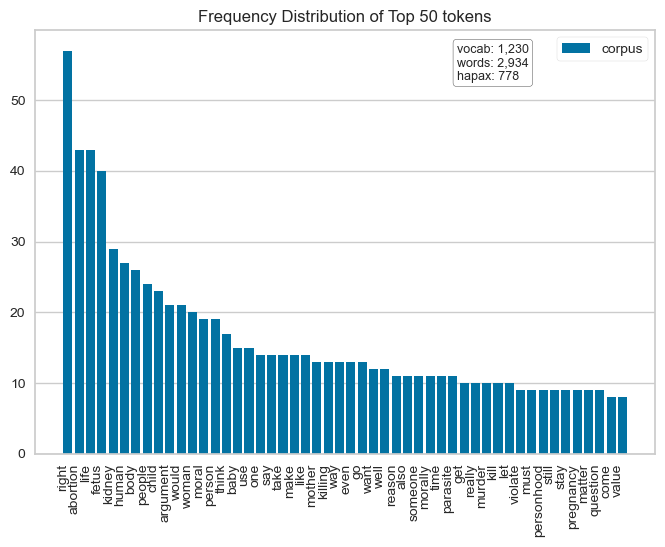

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [71]:
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

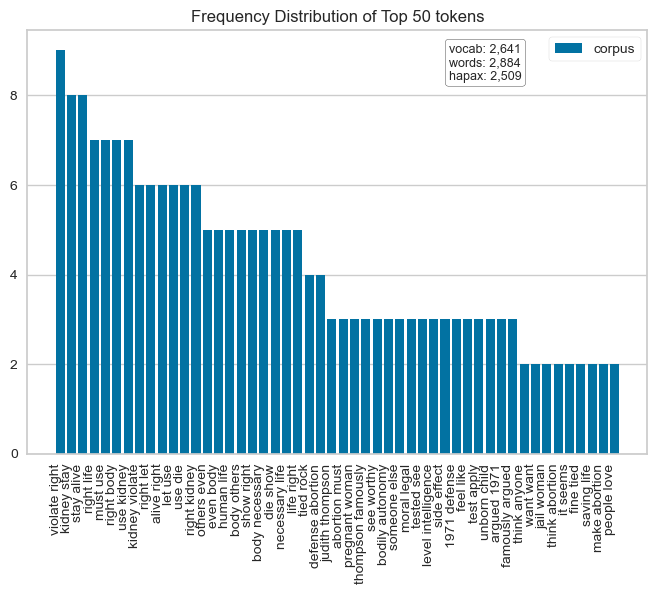

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [72]:
vectorizer = CountVectorizer(ngram_range=(2,2))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

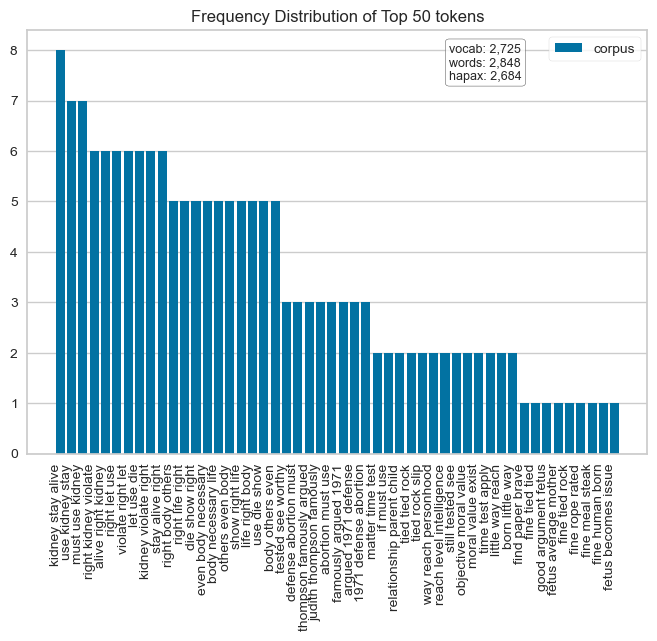

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [73]:
# Let's try 3-grams
vectorizer = CountVectorizer(ngram_range=(3,3))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

done in 0.057s.


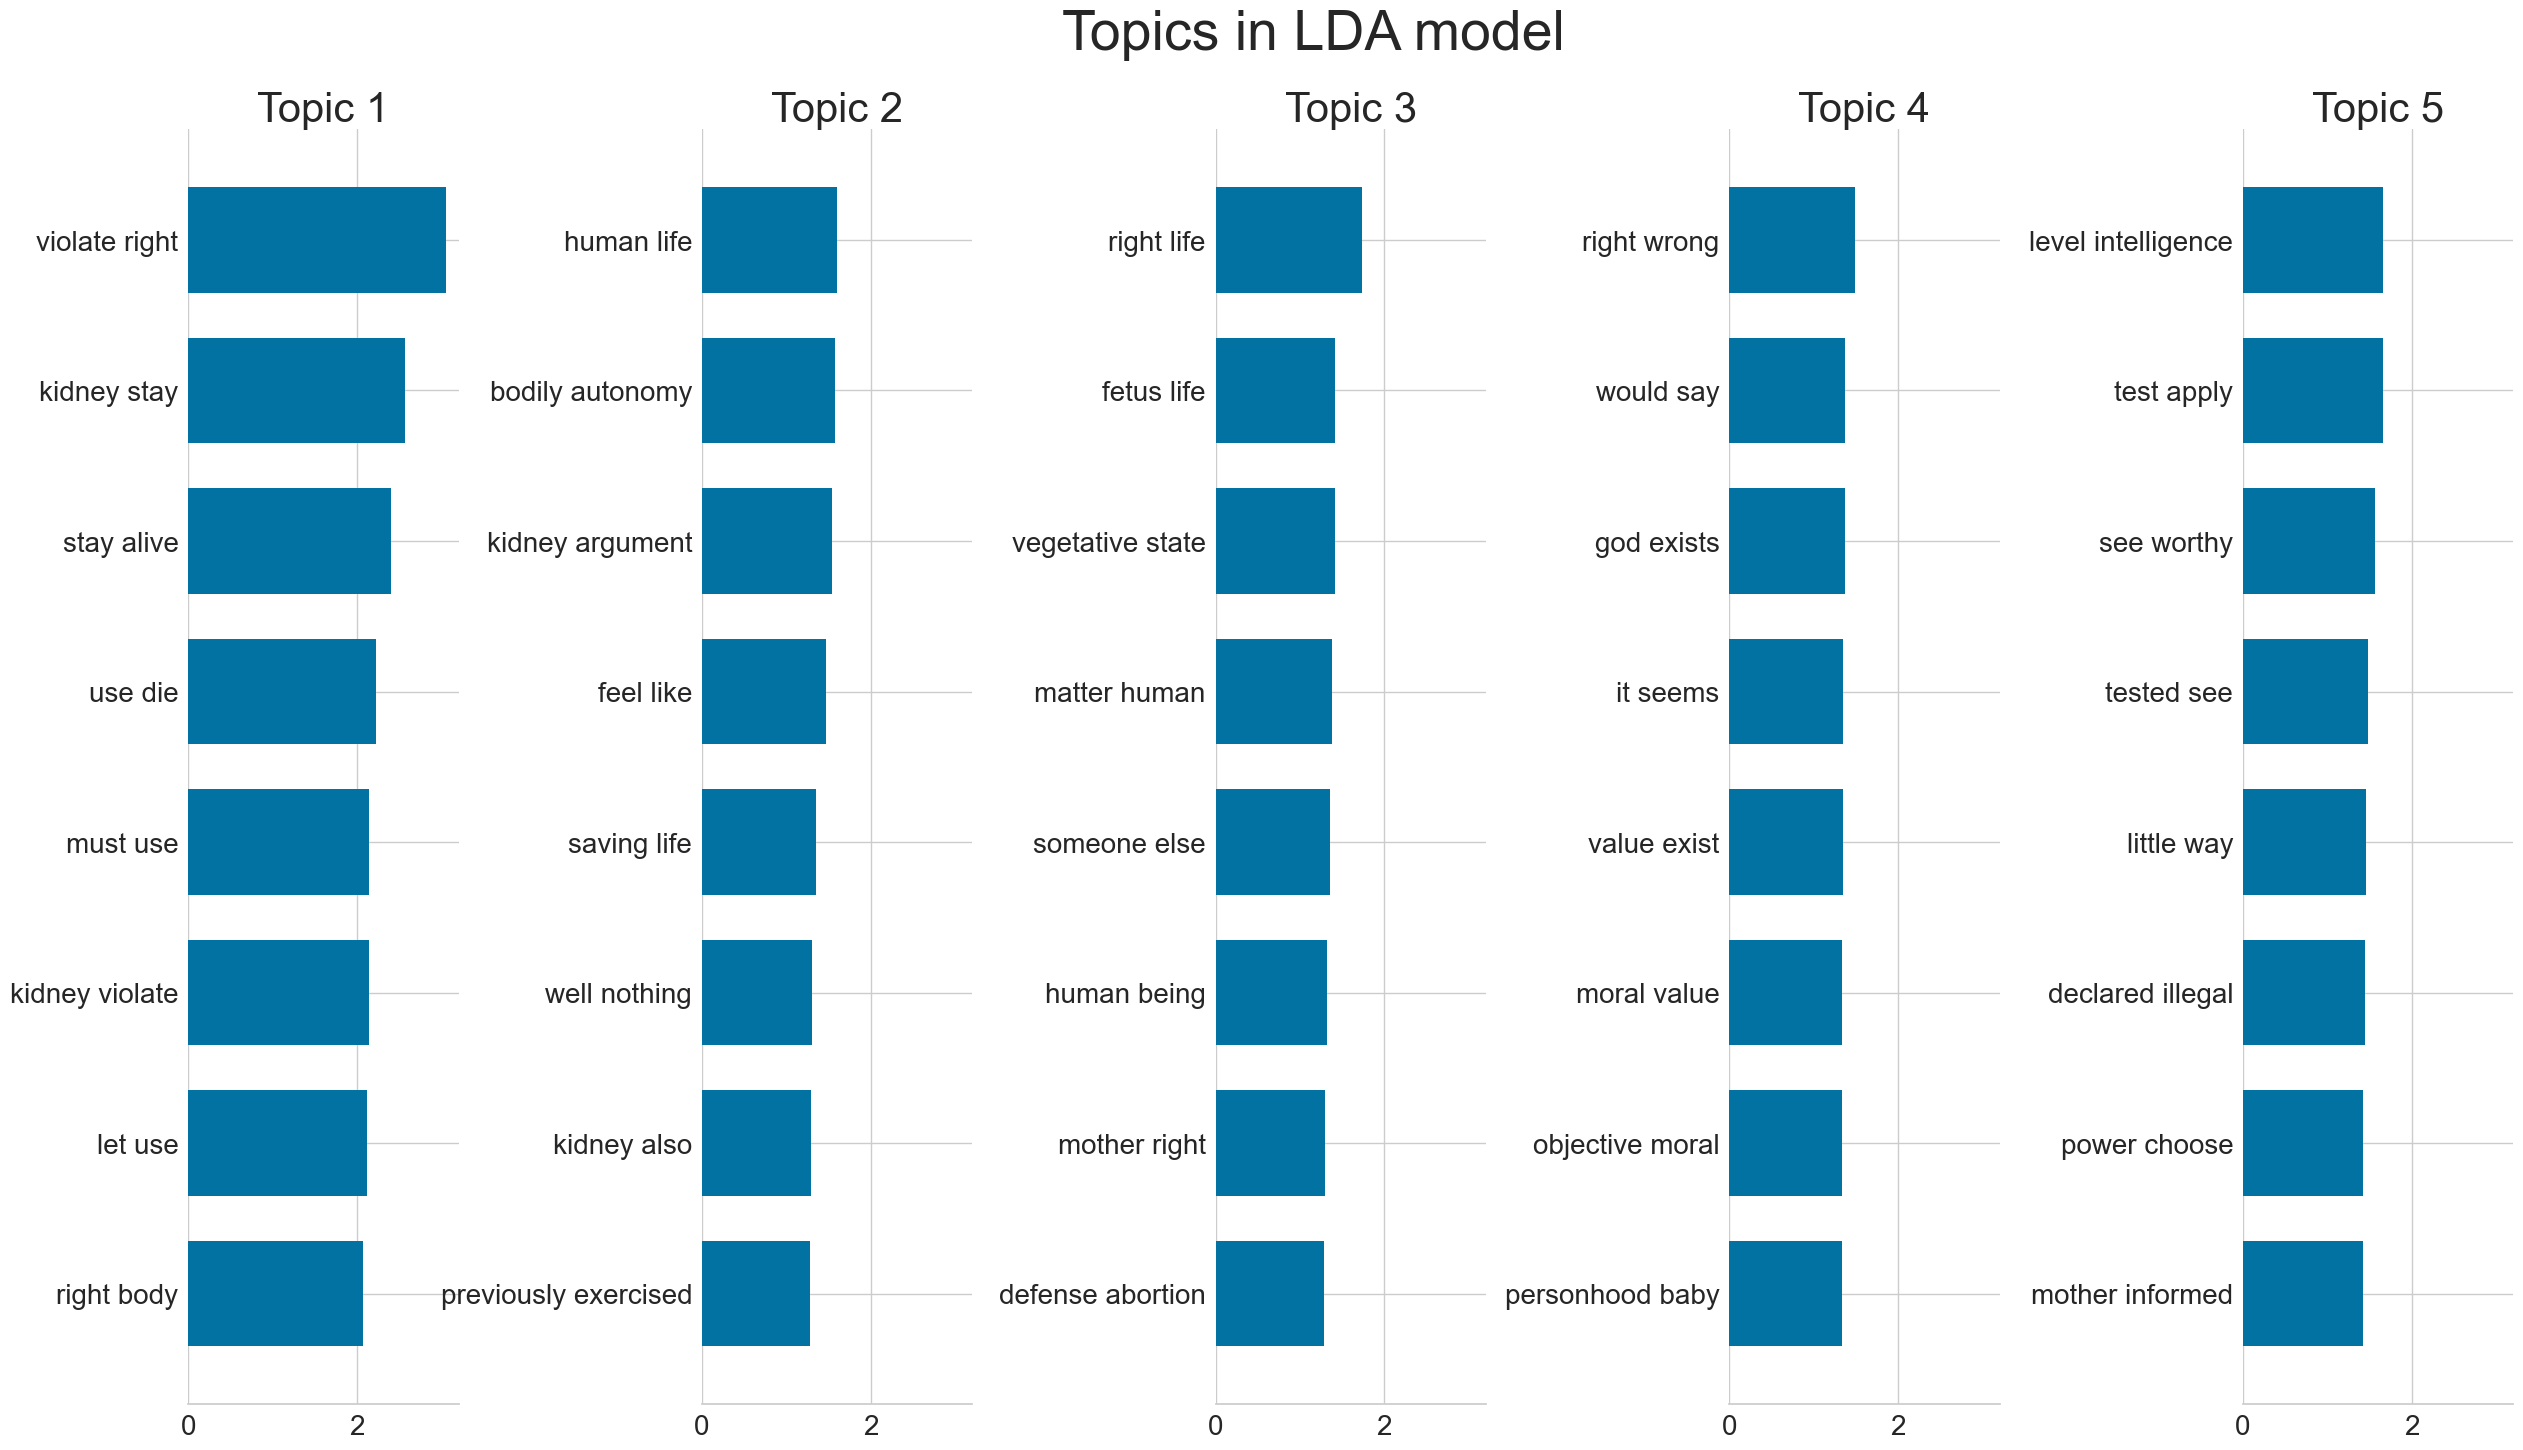

In [74]:
n_samples = 3000
n_features = 2000 
n_components = 5 # number of topics
n_top_words = 8  # number of topic words

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(2,2))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

done in 0.055s.


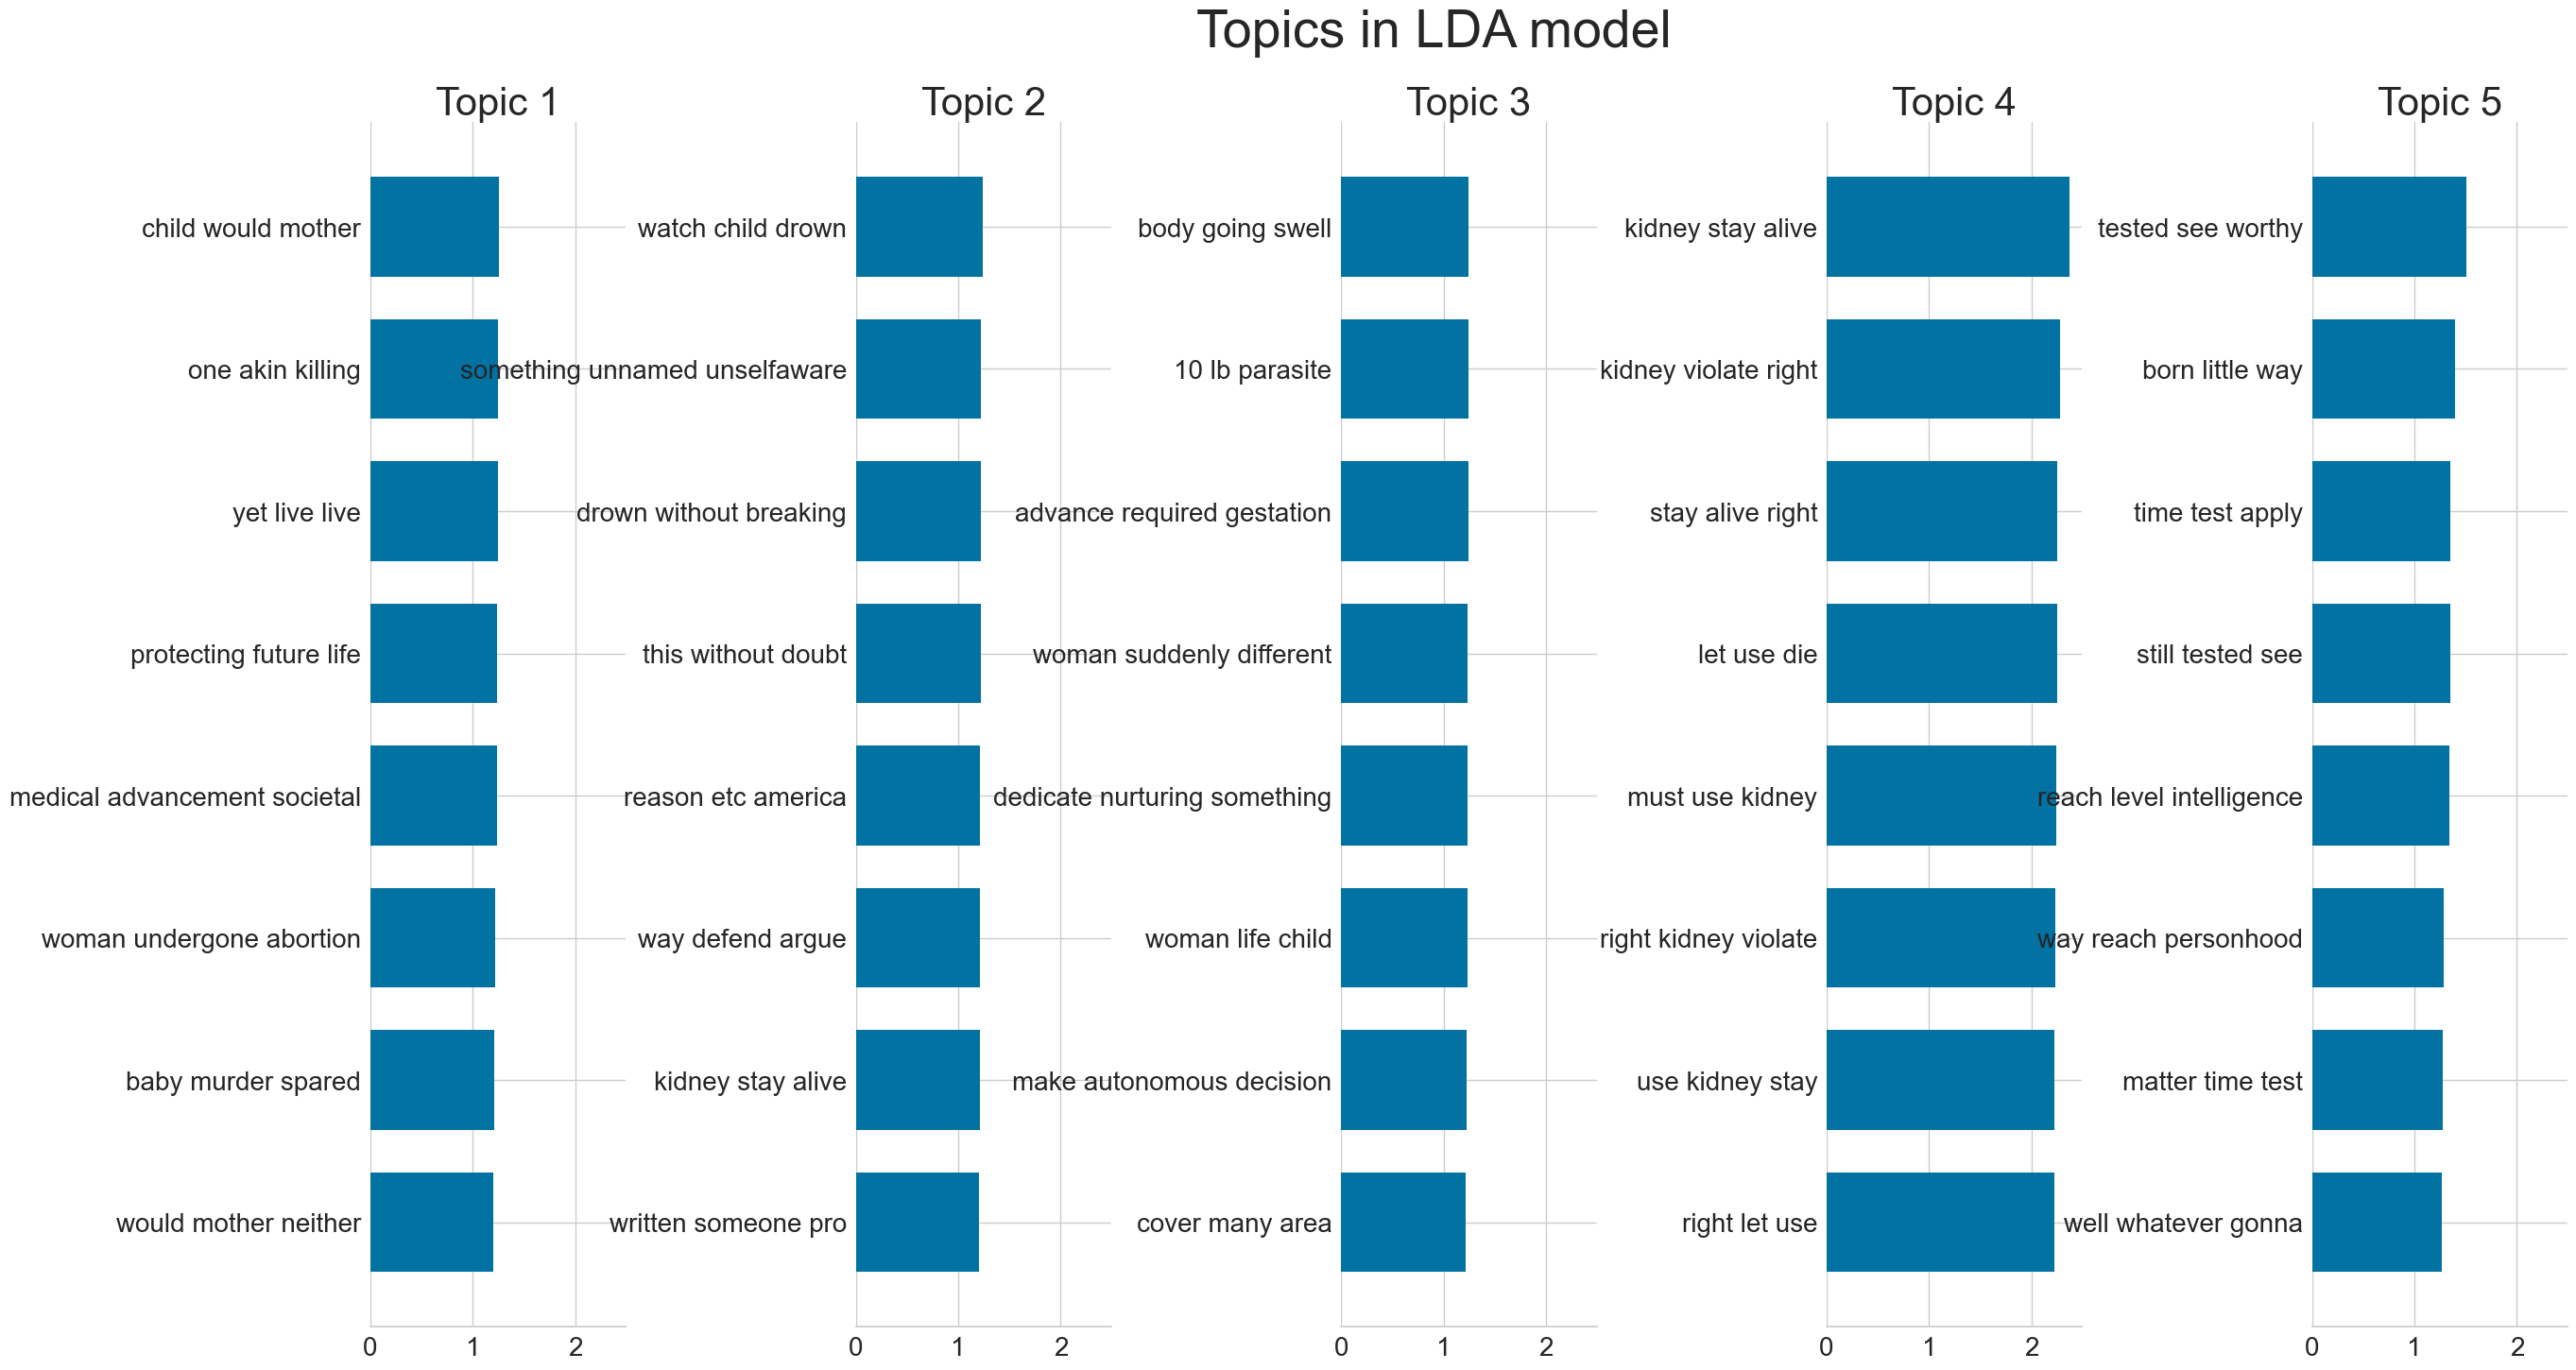

In [75]:
# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(3,3))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

# Study #3
## Money and Happiness

In [76]:
url = "https://www.reddit.com/r/AskReddit/comments/27dodr/wealthy_people_of_reddit_does_money_buy_happiness/"
submission = reddit.submission(url=url)

In [77]:
document=[]
submission.comments.replace_more(limit=100)
for top_level_comment in submission.comments:
        document.append(top_level_comment.body)

In [78]:
#Let's put this into a dataframe
author=[]
submission.comments.replace_more(limit=5)
for top_level_comment in submission.comments:
        author.append(top_level_comment.author)

import pandas as pd

df = pd.DataFrame(list(zip(author, document)),
               columns =['Author', 'Comment'])

In [79]:
# Save dataframe in csv format to computer

df.to_csv('praw_output_happiness.csv')

In [80]:
# we will pick one of the rows as our example sentence for the following demonstrations.
example = df['Comment'].to_string()
type(example)

str

In [81]:
import re
clean_example = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", example)
clean_example = re.sub(r"\W+", " ", clean_example)
clean_example

'0 No But it sure buys a shitload of unhappiness 1 I m not wealthy but I have wealthy family n 2 Well I used to make minimum wage now I make 3 Have you ever seen a sad person on a jet ski 4 My husband and I have taken the trip from payc 5 deleted 6 I saw somewhere that an annual income over 85k 7 Money buys freedom and money buys experiences 8 Debt buys sadness 9 Money makes life easier but IMO not happier 10 Let me start by saying I am not wealthy on my 11 Wealthy people of Reddit may I have 100 n 12 I m sure there s a famous saying about money n 13 not wealthy but happier now that I have some m 14 deleted 15 Don t be ridiculous Lemon Money IS happiness 16 Money buys opportunities and security Two thi 17 No but it does make some things easier You 18 I can say that money doesn t buy happiness it 19 All money does is buy you peace of mind Every 20 I m not wealthy but I m climbing a little bit 21 I d rather be miserable in a Porche than in a 22 Wealth earned gives a great sense of accomp

In [82]:
tokens = word_tokenize(clean_example)
print(tokens)

['0', 'No', 'But', 'it', 'sure', 'buys', 'a', 'shitload', 'of', 'unhappiness', '1', 'I', 'm', 'not', 'wealthy', 'but', 'I', 'have', 'wealthy', 'family', 'n', '2', 'Well', 'I', 'used', 'to', 'make', 'minimum', 'wage', 'now', 'I', 'make', '3', 'Have', 'you', 'ever', 'seen', 'a', 'sad', 'person', 'on', 'a', 'jet', 'ski', '4', 'My', 'husband', 'and', 'I', 'have', 'taken', 'the', 'trip', 'from', 'payc', '5', 'deleted', '6', 'I', 'saw', 'somewhere', 'that', 'an', 'annual', 'income', 'over', '85k', '7', 'Money', 'buys', 'freedom', 'and', 'money', 'buys', 'experiences', '8', 'Debt', 'buys', 'sadness', '9', 'Money', 'makes', 'life', 'easier', 'but', 'IMO', 'not', 'happier', '10', 'Let', 'me', 'start', 'by', 'saying', 'I', 'am', 'not', 'wealthy', 'on', 'my', '11', 'Wealthy', 'people', 'of', 'Reddit', 'may', 'I', 'have', '100', 'n', '12', 'I', 'm', 'sure', 'there', 's', 'a', 'famous', 'saying', 'about', 'money', 'n', '13', 'not', 'wealthy', 'but', 'happier', 'now', 'that', 'I', 'have', 'some', 'm

In [83]:
clean_tokens = nltk.word_tokenize(clean_example)
filtered_words = [word for word in clean_tokens if word not in stopwords.words('english')]
filtered_words

['0',
 'No',
 'But',
 'sure',
 'buys',
 'shitload',
 'unhappiness',
 '1',
 'I',
 'wealthy',
 'I',
 'wealthy',
 'family',
 'n',
 '2',
 'Well',
 'I',
 'used',
 'make',
 'minimum',
 'wage',
 'I',
 'make',
 '3',
 'Have',
 'ever',
 'seen',
 'sad',
 'person',
 'jet',
 'ski',
 '4',
 'My',
 'husband',
 'I',
 'taken',
 'trip',
 'payc',
 '5',
 'deleted',
 '6',
 'I',
 'saw',
 'somewhere',
 'annual',
 'income',
 '85k',
 '7',
 'Money',
 'buys',
 'freedom',
 'money',
 'buys',
 'experiences',
 '8',
 'Debt',
 'buys',
 'sadness',
 '9',
 'Money',
 'makes',
 'life',
 'easier',
 'IMO',
 'happier',
 '10',
 'Let',
 'start',
 'saying',
 'I',
 'wealthy',
 '11',
 'Wealthy',
 'people',
 'Reddit',
 'may',
 'I',
 '100',
 'n',
 '12',
 'I',
 'sure',
 'famous',
 'saying',
 'money',
 'n',
 '13',
 'wealthy',
 'happier',
 'I',
 '14',
 'deleted',
 '15',
 'Don',
 'ridiculous',
 'Lemon',
 'Money',
 'IS',
 'happiness',
 '16',
 'Money',
 'buys',
 'opportunities',
 'security',
 'Two',
 'thi',
 '17',
 'No',
 'make',
 'things'

In [84]:
nltk.download('wordnet') # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.stem.porter import PorterStemmer
porter = [PorterStemmer().stem(word) for word in filtered_words]
porter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tcliu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['0',
 'no',
 'but',
 'sure',
 'buy',
 'shitload',
 'unhappi',
 '1',
 'i',
 'wealthi',
 'i',
 'wealthi',
 'famili',
 'n',
 '2',
 'well',
 'i',
 'use',
 'make',
 'minimum',
 'wage',
 'i',
 'make',
 '3',
 'have',
 'ever',
 'seen',
 'sad',
 'person',
 'jet',
 'ski',
 '4',
 'my',
 'husband',
 'i',
 'taken',
 'trip',
 'payc',
 '5',
 'delet',
 '6',
 'i',
 'saw',
 'somewher',
 'annual',
 'incom',
 '85k',
 '7',
 'money',
 'buy',
 'freedom',
 'money',
 'buy',
 'experi',
 '8',
 'debt',
 'buy',
 'sad',
 '9',
 'money',
 'make',
 'life',
 'easier',
 'imo',
 'happier',
 '10',
 'let',
 'start',
 'say',
 'i',
 'wealthi',
 '11',
 'wealthi',
 'peopl',
 'reddit',
 'may',
 'i',
 '100',
 'n',
 '12',
 'i',
 'sure',
 'famou',
 'say',
 'money',
 'n',
 '13',
 'wealthi',
 'happier',
 'i',
 '14',
 'delet',
 '15',
 'don',
 'ridicul',
 'lemon',
 'money',
 'is',
 'happi',
 '16',
 'money',
 'buy',
 'opportun',
 'secur',
 'two',
 'thi',
 '17',
 'no',
 'make',
 'thing',
 'easier',
 'you',
 '18',
 'i',
 'say',
 'money'

In [85]:
from nltk.stem import WordNetLemmatizer
wordnet = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]
wordnet

['0',
 'No',
 'But',
 'sure',
 'buy',
 'shitload',
 'unhappiness',
 '1',
 'I',
 'wealthy',
 'I',
 'wealthy',
 'family',
 'n',
 '2',
 'Well',
 'I',
 'used',
 'make',
 'minimum',
 'wage',
 'I',
 'make',
 '3',
 'Have',
 'ever',
 'seen',
 'sad',
 'person',
 'jet',
 'ski',
 '4',
 'My',
 'husband',
 'I',
 'taken',
 'trip',
 'payc',
 '5',
 'deleted',
 '6',
 'I',
 'saw',
 'somewhere',
 'annual',
 'income',
 '85k',
 '7',
 'Money',
 'buy',
 'freedom',
 'money',
 'buy',
 'experience',
 '8',
 'Debt',
 'buy',
 'sadness',
 '9',
 'Money',
 'make',
 'life',
 'easier',
 'IMO',
 'happier',
 '10',
 'Let',
 'start',
 'saying',
 'I',
 'wealthy',
 '11',
 'Wealthy',
 'people',
 'Reddit',
 'may',
 'I',
 '100',
 'n',
 '12',
 'I',
 'sure',
 'famous',
 'saying',
 'money',
 'n',
 '13',
 'wealthy',
 'happier',
 'I',
 '14',
 'deleted',
 '15',
 'Don',
 'ridiculous',
 'Lemon',
 'Money',
 'IS',
 'happiness',
 '16',
 'Money',
 'buy',
 'opportunity',
 'security',
 'Two',
 'thi',
 '17',
 'No',
 'make',
 'thing',
 'easier

In [86]:
# Running it through preprocessing
import nltk
import truecase
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def preprocess(x):
    # Remove unwanted characters
    x = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", x)
    x = re.sub(r"\W+", " ", x)
    
    # Truecase
    x = truecase.get_true_case(x)
    
    #Remove stopwards and lemmatize
    x = [WordNetLemmatizer().lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

df['clean'] = df['Comment'].apply(preprocess)
df['length'] = df['clean'].apply(len) # to add a new column for wordcount

display(df)

Author                                            Comment  \
0             Ted_Denslow  No. But it sure buys a shitload of unhappiness...   
1                    None  I'm not wealthy, but I have wealthy family.\n\...   
2                    None  Well, I used to make minimum wage, now I make ...   
3                 Nefermo  Have you ever seen a sad person on a jet ski?\...   
4        Robot_Girlfriend  My husband and I have taken the trip from payc...   
..                    ...                                                ...   
381         BobSacramanto                I don't know; but being poor sucks.   
382                  None       If you worked your ass off for it, then yes.   
383             BonerMan_                   Depends how many slaves one has.   
384       Captain_KiIIjoy  Fuck yeah it does. Got titties in my face when...   
385  happywealththrowaway  Not at wealthy yet but 200k+ in NY Metro area....   

                                                 clean  length  
0          No sure BUYS Shitload unhappiness repellent      43  
1    I wealthy I wealthy family money BUYS security...     628  
2    Well I used make minimum wage I make 70K yr I ...     106  
3    Have ever seen sad person jet ski money BUYS j...      53  
4    My husband I taken trip paycheck paycheck two ...     646  
..                                                 ...     ...  
381                                  I know poor Sucks      17  
382                                   If worked as yes      16  
383                             Depends many slave one      22  
384  Fuck Yeah got Titties face whenever I want nic...      97  
385  Not wealthy yet 200K NY Metro area really peac...     217  

[386 rows x 4 columns]

In [87]:
df['sentiment'] = df['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

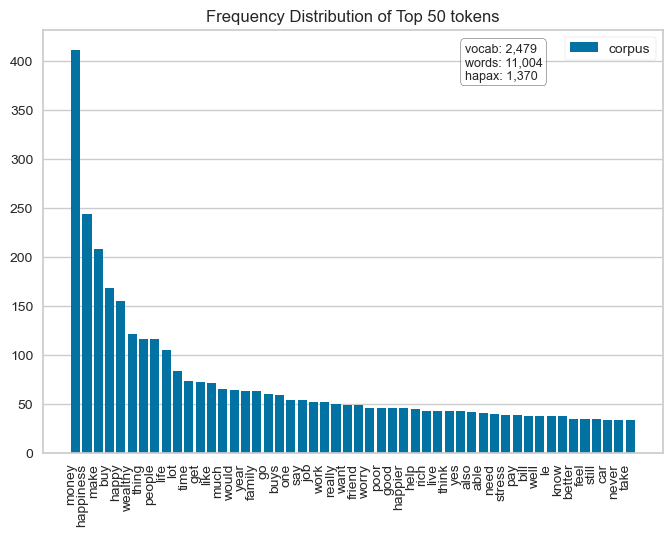

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [88]:
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

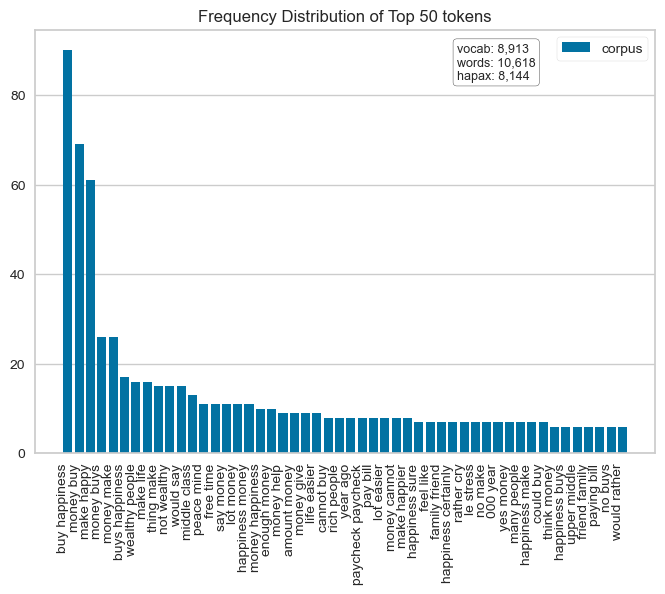

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [89]:
vectorizer = CountVectorizer(ngram_range=(2,2))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

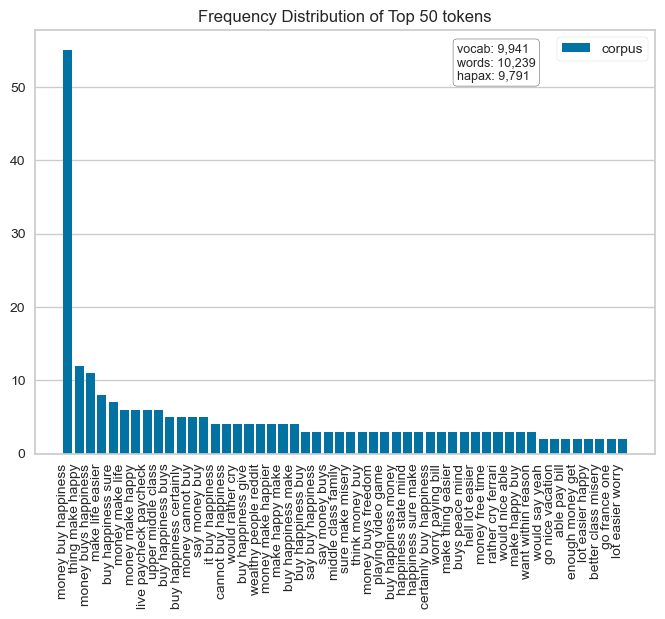

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [90]:
# Let's try 3-grams
vectorizer = CountVectorizer(ngram_range=(3,3))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

done in 0.231s.


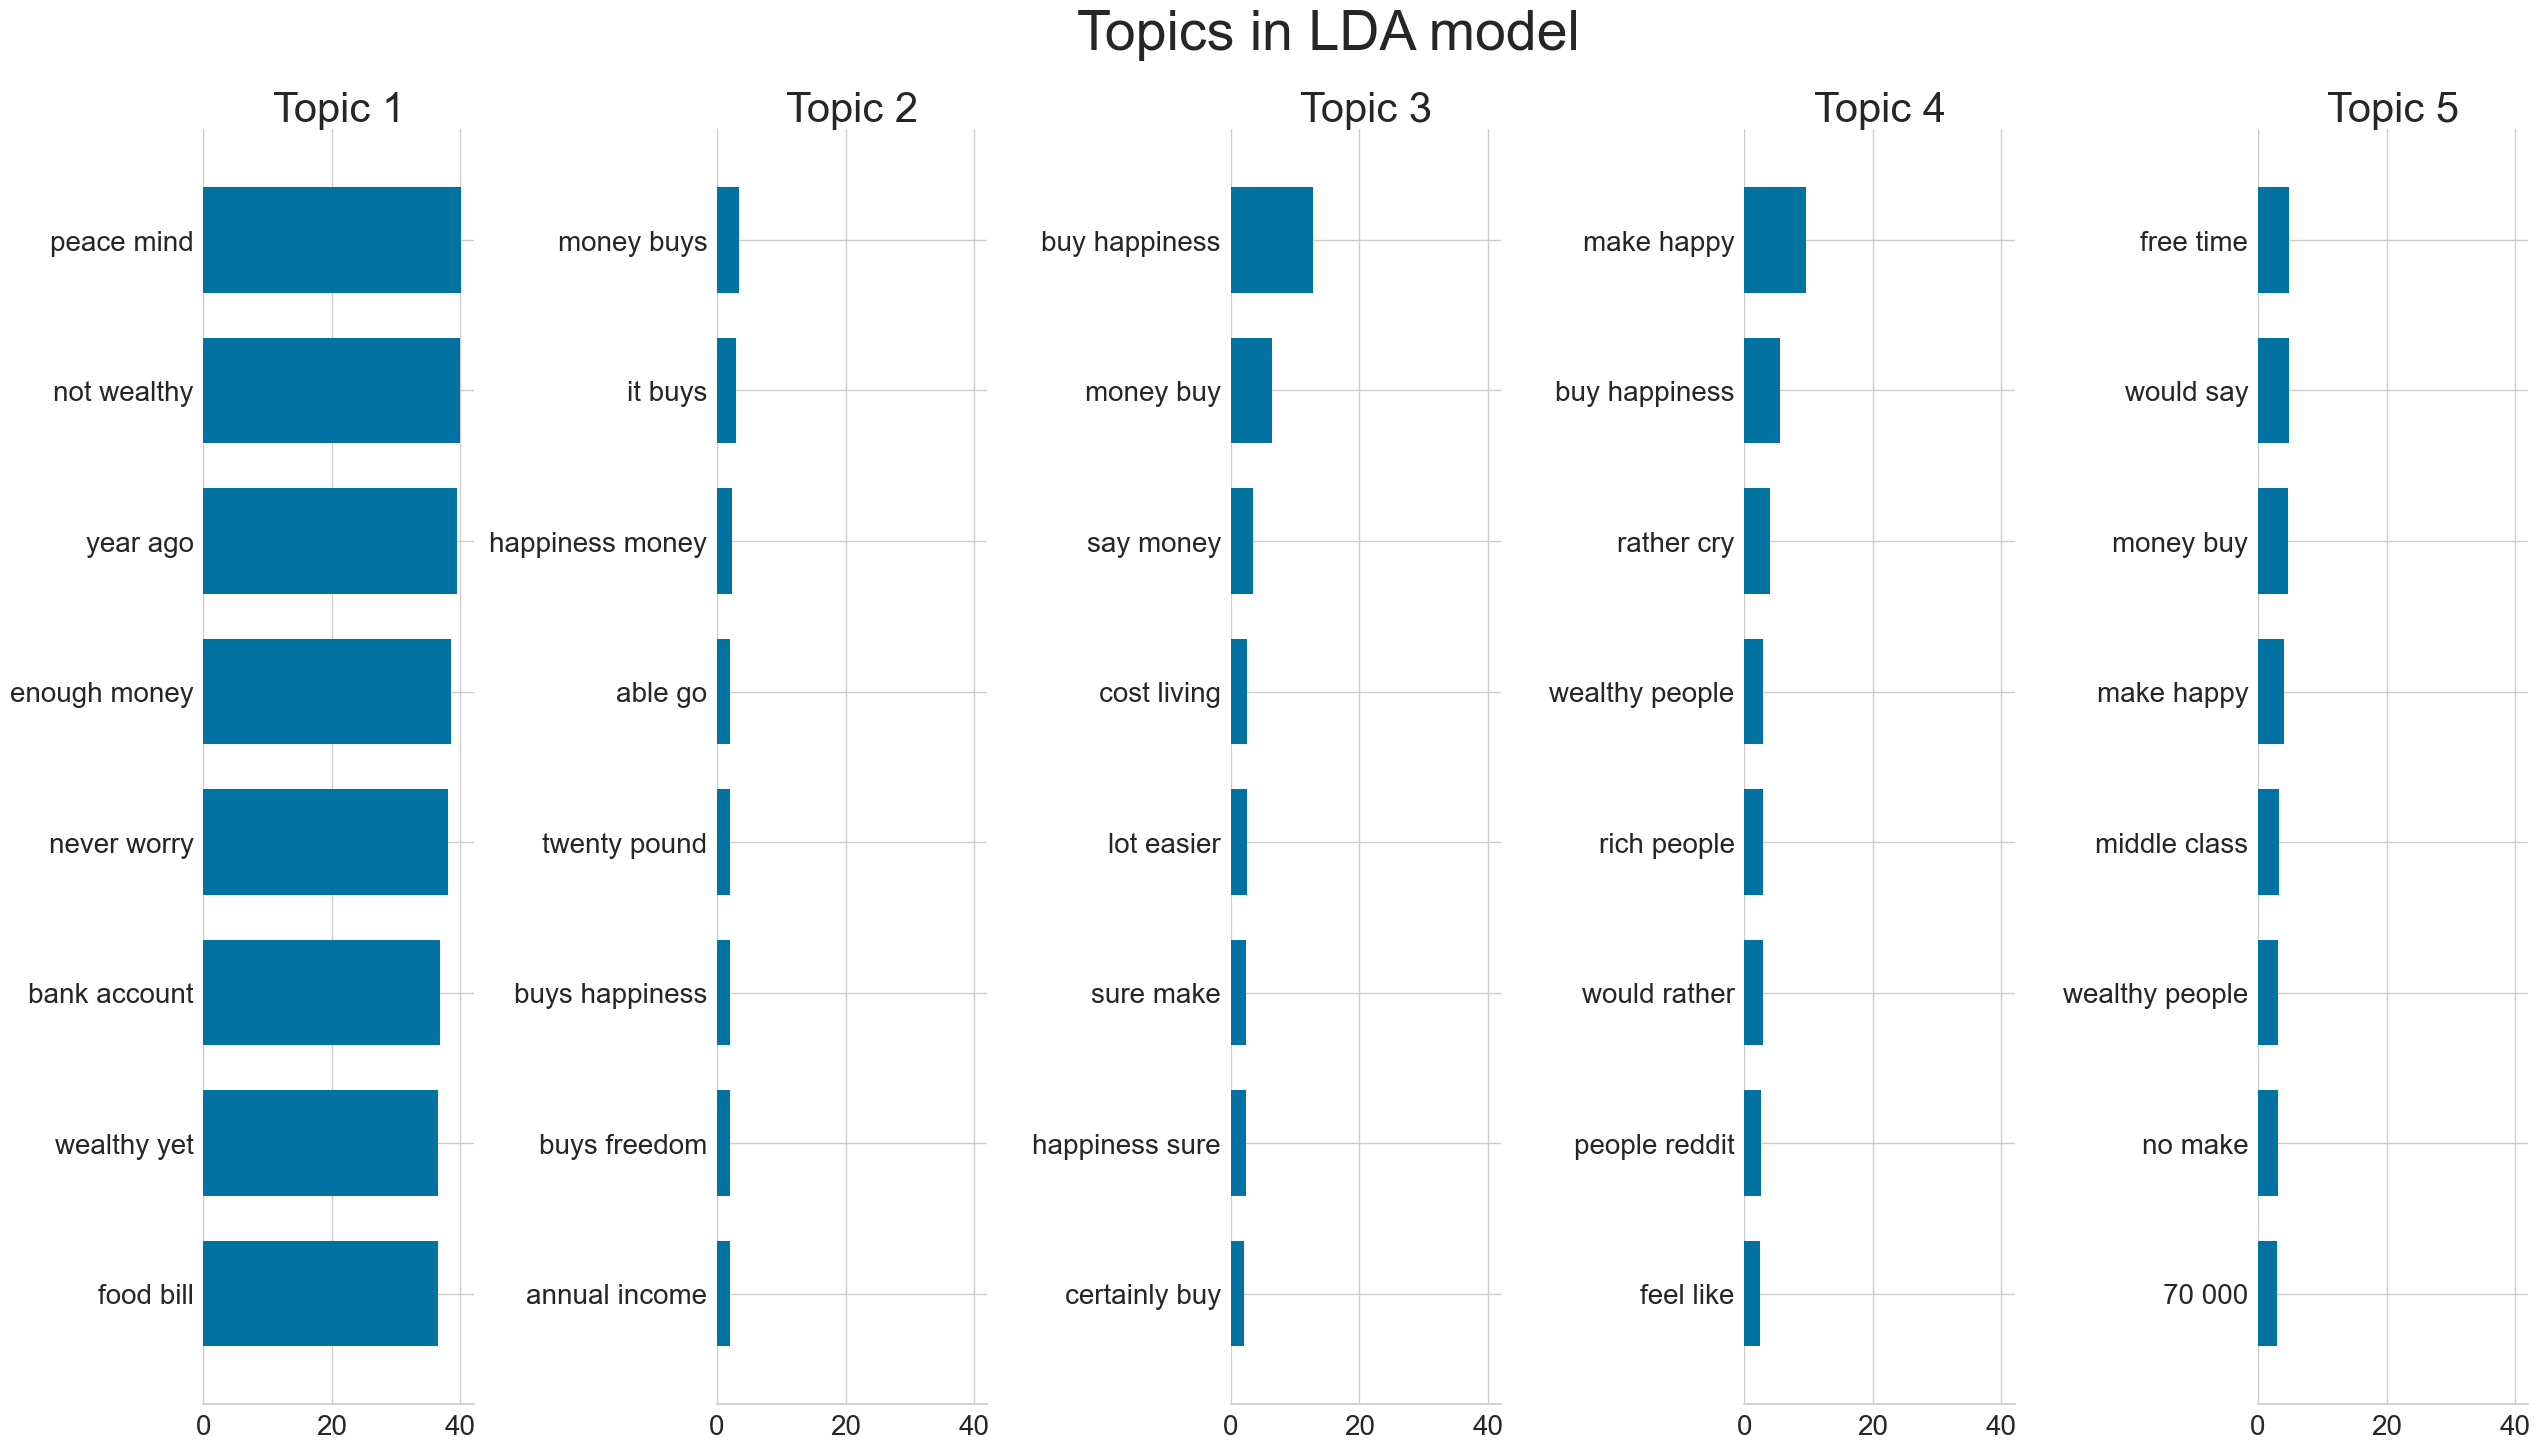

In [91]:
n_samples = 3000
n_features = 2000 
n_components = 5 # number of topics
n_top_words = 8  # number of topic words

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(2,2))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

done in 0.174s.


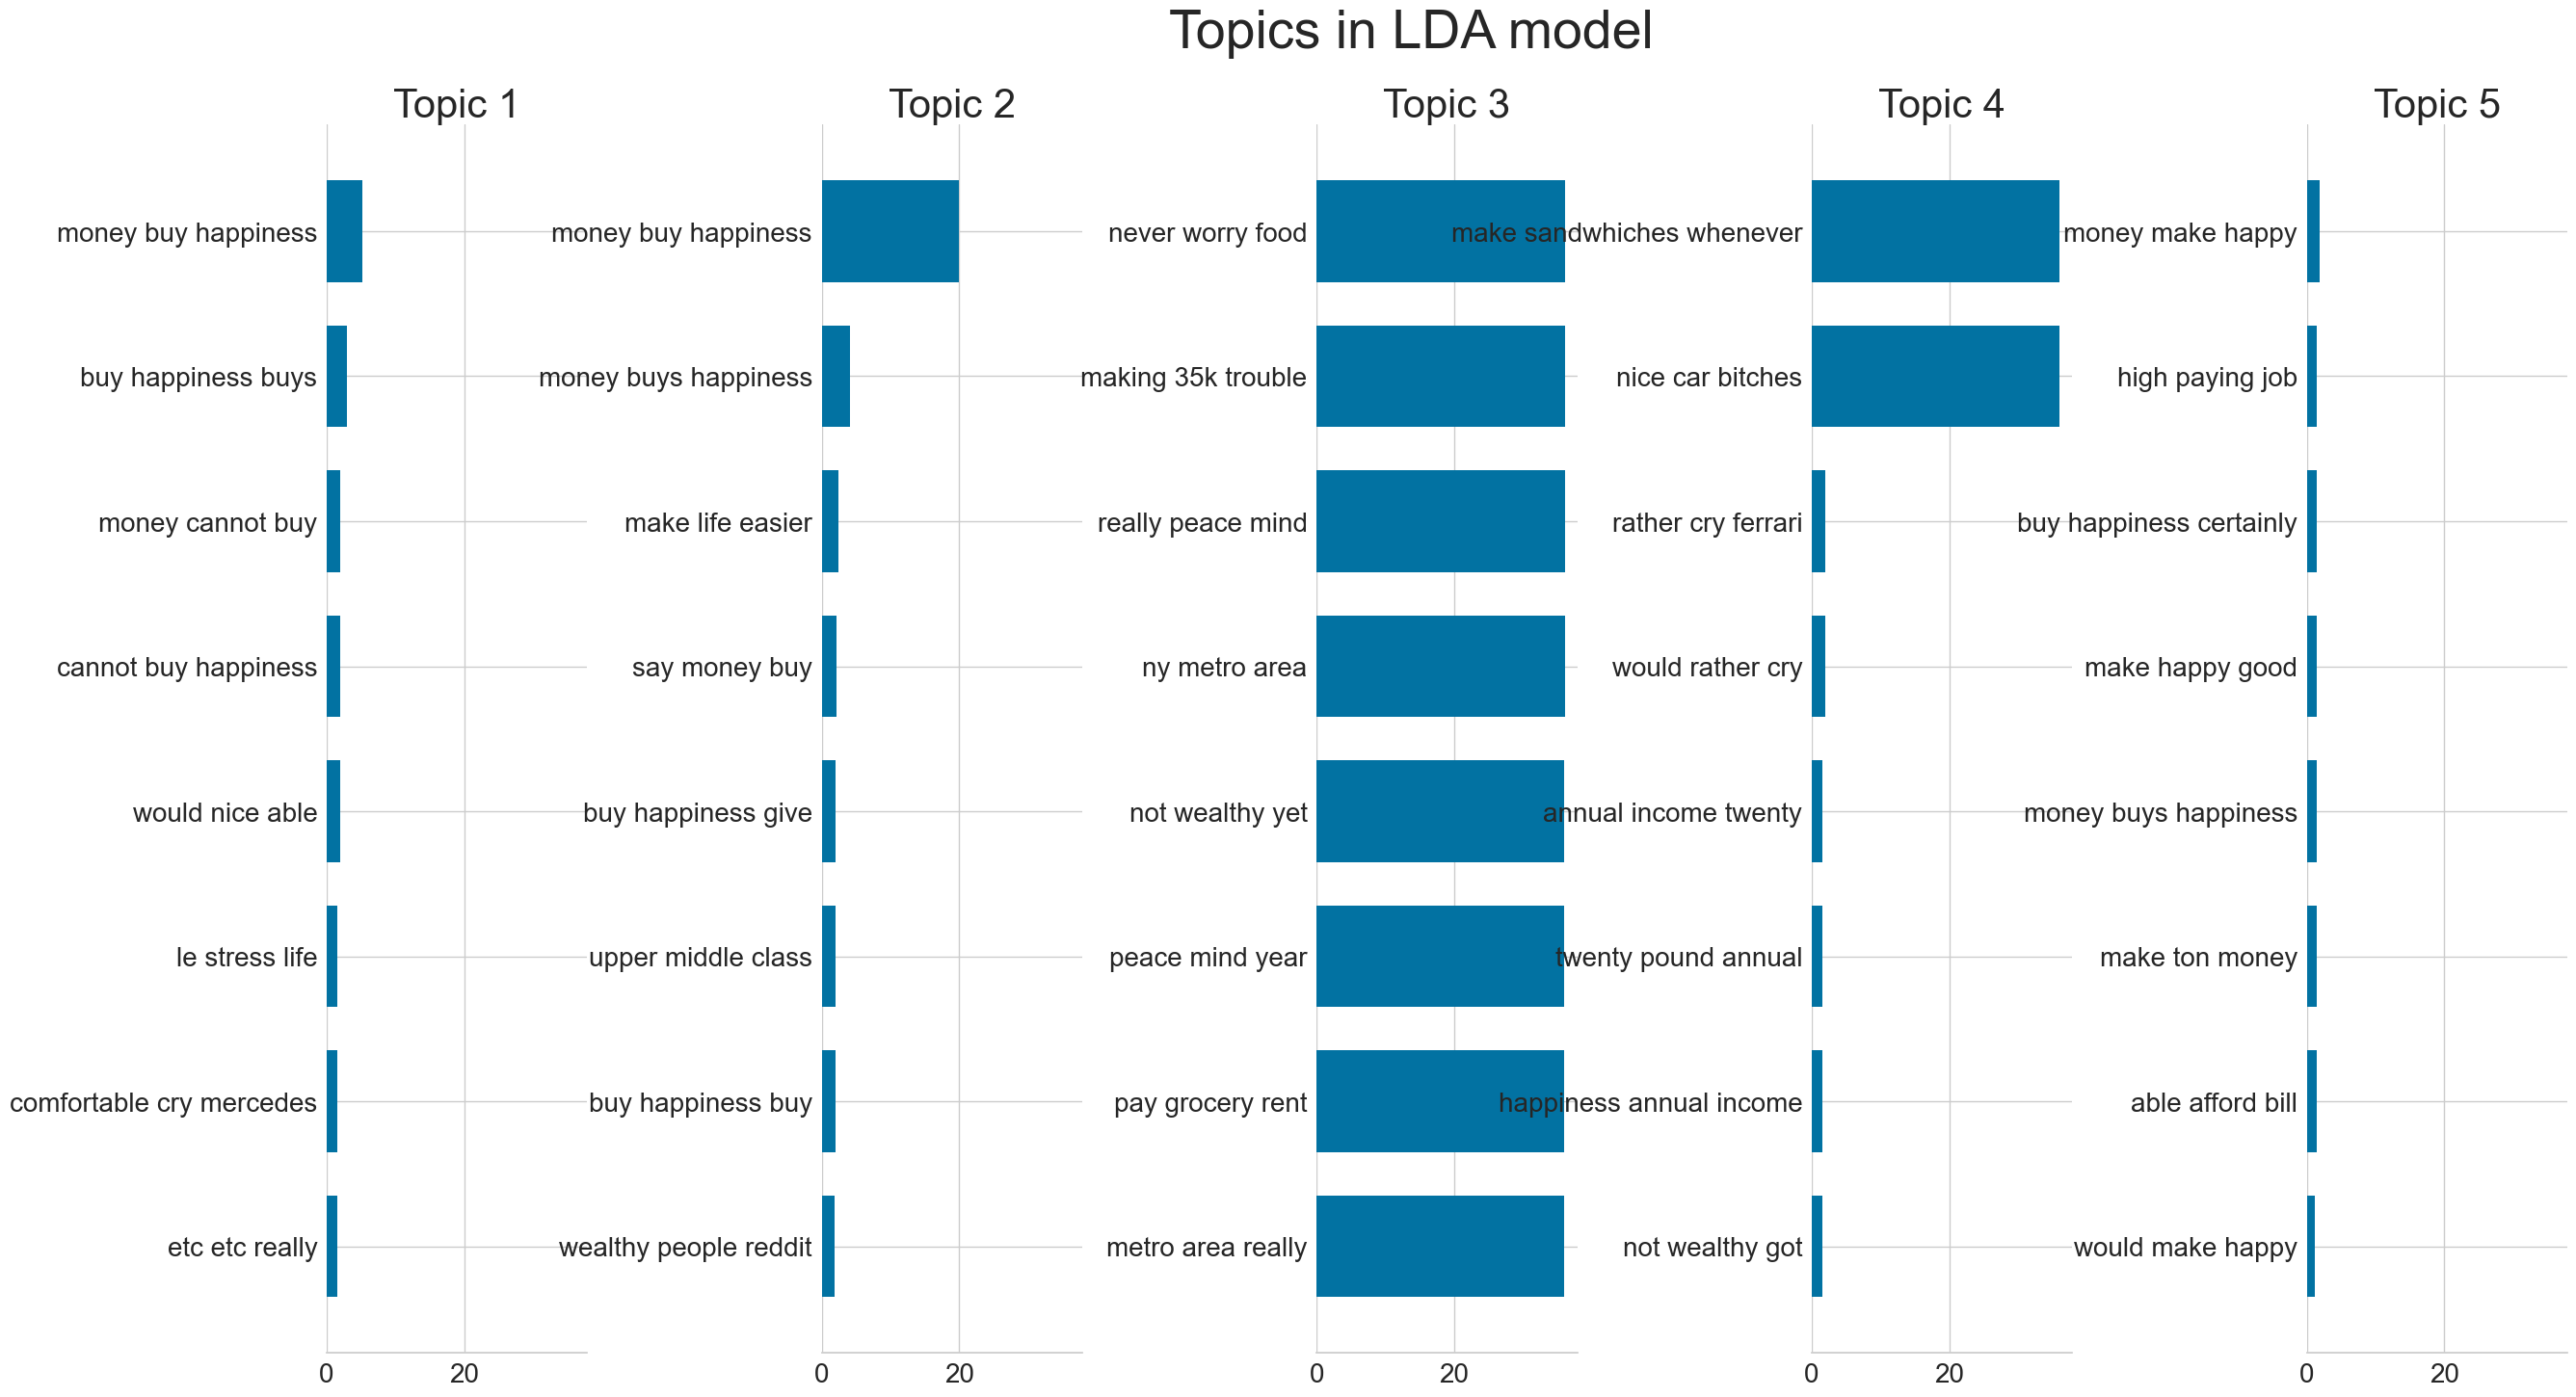

In [92]:
# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(3,3))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

# Study #4
## Humanity and AI

In [93]:
url = "https://www.reddit.com/r/Futurology/comments/y4ne12/theres_a_damn_good_chance_ai_will_destroy/"
submission = reddit.submission(url=url)

In [94]:
document=[]
submission.comments.replace_more(limit=100)
for top_level_comment in submission.comments:
        document.append(top_level_comment.body)

In [95]:
#Let's put this into a dataframe
author=[]
submission.comments.replace_more(limit=5)
for top_level_comment in submission.comments:
        author.append(top_level_comment.author)

import pandas as pd

df = pd.DataFrame(list(zip(author, document)),
               columns =['Author', 'Comment'])

In [96]:
# Save dataframe in csv format to computer

df.to_csv('praw_output_AI.csv')

In [97]:
# we will pick one of the rows as our example sentence for the following demonstrations.
example = df['Comment'].to_string()
type(example)

str

In [98]:
import re
clean_example = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", example)
clean_example = re.sub(r"\W+", " ", clean_example)
clean_example

'0 The following submission statement was provide 1 Humanity has a pretty big head start on destro 2 Does anyone know if it s gonna happen before n 3 removed 4 Researchers Say n nGotta love a headline wi 5 If we created AI and AI destroys us then we 6 Well AI better get a move on The climate the 7 What vector are the guessing that AI will dest 8 We d probably turn ourselves over to an AI if 9 AI is just our next form Immortal cyber being 10 I m confused because is there any AI that can 11 I doubt it We ll do that ourselves first long 12 Humanity has a damn good chance of destroying 13 The more likelihood is that AI wielders will l 14 It doesn t require Artificial intelligence AI 15 I for one will welcome our AI overlords It 16 I bet humanity will destroy humanity way befor 17 No there really isn t a good chance Its a m 18 deleted 19 All systems should include a Humans Not Extin 20 THIS WOULD BE A GOOD TIME TO PREVENT THAT BUT 21 Oh thank god I thought it was gonna be climat 22 There s 

In [99]:
tokens = word_tokenize(clean_example)
print(tokens)

['0', 'The', 'following', 'submission', 'statement', 'was', 'provide', '1', 'Humanity', 'has', 'a', 'pretty', 'big', 'head', 'start', 'on', 'destro', '2', 'Does', 'anyone', 'know', 'if', 'it', 's', 'gon', 'na', 'happen', 'before', 'n', '3', 'removed', '4', 'Researchers', 'Say', 'n', 'nGotta', 'love', 'a', 'headline', 'wi', '5', 'If', 'we', 'created', 'AI', 'and', 'AI', 'destroys', 'us', 'then', 'we', '6', 'Well', 'AI', 'better', 'get', 'a', 'move', 'on', 'The', 'climate', 'the', '7', 'What', 'vector', 'are', 'the', 'guessing', 'that', 'AI', 'will', 'dest', '8', 'We', 'd', 'probably', 'turn', 'ourselves', 'over', 'to', 'an', 'AI', 'if', '9', 'AI', 'is', 'just', 'our', 'next', 'form', 'Immortal', 'cyber', 'being', '10', 'I', 'm', 'confused', 'because', 'is', 'there', 'any', 'AI', 'that', 'can', '11', 'I', 'doubt', 'it', 'We', 'll', 'do', 'that', 'ourselves', 'first', 'long', '12', 'Humanity', 'has', 'a', 'damn', 'good', 'chance', 'of', 'destroying', '13', 'The', 'more', 'likelihood', 'is

In [100]:
clean_tokens = nltk.word_tokenize(clean_example)
filtered_words = [word for word in clean_tokens if word not in stopwords.words('english')]
filtered_words

['0',
 'The',
 'following',
 'submission',
 'statement',
 'provide',
 '1',
 'Humanity',
 'pretty',
 'big',
 'head',
 'start',
 'destro',
 '2',
 'Does',
 'anyone',
 'know',
 'gon',
 'na',
 'happen',
 'n',
 '3',
 'removed',
 '4',
 'Researchers',
 'Say',
 'n',
 'nGotta',
 'love',
 'headline',
 'wi',
 '5',
 'If',
 'created',
 'AI',
 'AI',
 'destroys',
 'us',
 '6',
 'Well',
 'AI',
 'better',
 'get',
 'move',
 'The',
 'climate',
 '7',
 'What',
 'vector',
 'guessing',
 'AI',
 'dest',
 '8',
 'We',
 'probably',
 'turn',
 'AI',
 '9',
 'AI',
 'next',
 'form',
 'Immortal',
 'cyber',
 '10',
 'I',
 'confused',
 'AI',
 '11',
 'I',
 'doubt',
 'We',
 'first',
 'long',
 '12',
 'Humanity',
 'damn',
 'good',
 'chance',
 'destroying',
 '13',
 'The',
 'likelihood',
 'AI',
 'wielders',
 'l',
 '14',
 'It',
 'require',
 'Artificial',
 'intelligence',
 'AI',
 '15',
 'I',
 'one',
 'welcome',
 'AI',
 'overlords',
 'It',
 '16',
 'I',
 'bet',
 'humanity',
 'destroy',
 'humanity',
 'way',
 'befor',
 '17',
 'No',
 'r

In [101]:
nltk.download('wordnet') # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.stem.porter import PorterStemmer
porter = [PorterStemmer().stem(word) for word in filtered_words]
porter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tcliu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['0',
 'the',
 'follow',
 'submiss',
 'statement',
 'provid',
 '1',
 'human',
 'pretti',
 'big',
 'head',
 'start',
 'destro',
 '2',
 'doe',
 'anyon',
 'know',
 'gon',
 'na',
 'happen',
 'n',
 '3',
 'remov',
 '4',
 'research',
 'say',
 'n',
 'ngotta',
 'love',
 'headlin',
 'wi',
 '5',
 'if',
 'creat',
 'ai',
 'ai',
 'destroy',
 'us',
 '6',
 'well',
 'ai',
 'better',
 'get',
 'move',
 'the',
 'climat',
 '7',
 'what',
 'vector',
 'guess',
 'ai',
 'dest',
 '8',
 'we',
 'probabl',
 'turn',
 'ai',
 '9',
 'ai',
 'next',
 'form',
 'immort',
 'cyber',
 '10',
 'i',
 'confus',
 'ai',
 '11',
 'i',
 'doubt',
 'we',
 'first',
 'long',
 '12',
 'human',
 'damn',
 'good',
 'chanc',
 'destroy',
 '13',
 'the',
 'likelihood',
 'ai',
 'wielder',
 'l',
 '14',
 'it',
 'requir',
 'artifici',
 'intellig',
 'ai',
 '15',
 'i',
 'one',
 'welcom',
 'ai',
 'overlord',
 'it',
 '16',
 'i',
 'bet',
 'human',
 'destroy',
 'human',
 'way',
 'befor',
 '17',
 'no',
 'realli',
 'good',
 'chanc',
 'it',
 '18',
 'delet',
 '

In [102]:
from nltk.stem import WordNetLemmatizer
wordnet = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]
wordnet

['0',
 'The',
 'following',
 'submission',
 'statement',
 'provide',
 '1',
 'Humanity',
 'pretty',
 'big',
 'head',
 'start',
 'destro',
 '2',
 'Does',
 'anyone',
 'know',
 'gon',
 'na',
 'happen',
 'n',
 '3',
 'removed',
 '4',
 'Researchers',
 'Say',
 'n',
 'nGotta',
 'love',
 'headline',
 'wi',
 '5',
 'If',
 'created',
 'AI',
 'AI',
 'destroys',
 'u',
 '6',
 'Well',
 'AI',
 'better',
 'get',
 'move',
 'The',
 'climate',
 '7',
 'What',
 'vector',
 'guessing',
 'AI',
 'dest',
 '8',
 'We',
 'probably',
 'turn',
 'AI',
 '9',
 'AI',
 'next',
 'form',
 'Immortal',
 'cyber',
 '10',
 'I',
 'confused',
 'AI',
 '11',
 'I',
 'doubt',
 'We',
 'first',
 'long',
 '12',
 'Humanity',
 'damn',
 'good',
 'chance',
 'destroying',
 '13',
 'The',
 'likelihood',
 'AI',
 'wielders',
 'l',
 '14',
 'It',
 'require',
 'Artificial',
 'intelligence',
 'AI',
 '15',
 'I',
 'one',
 'welcome',
 'AI',
 'overlord',
 'It',
 '16',
 'I',
 'bet',
 'humanity',
 'destroy',
 'humanity',
 'way',
 'befor',
 '17',
 'No',
 'rea

In [103]:
# Running it through preprocessing
import nltk
import truecase
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def preprocess(x):
    # Remove unwanted characters
    x = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", x)
    x = re.sub(r"\W+", " ", x)
    
    # Truecase
    x = truecase.get_true_case(x)
    
    #Remove stopwards and lemmatize
    x = [WordNetLemmatizer().lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

df['clean'] = df['Comment'].apply(preprocess)
df['length'] = df['clean'].apply(len) # to add a new column for wordcount

display(df)

Author                                            Comment  \
0         FuturologyBot  The following submission statement was provide...   
1           Wild_Garlic  Humanity has a pretty big head start on destro...   
2            Imfrank123  Does anyone know if it’s gonna happen before n...   
3                  None                                          [removed]   
4       networking_noob  >Researchers Say  \n\nGotta love a headline wi...   
..                  ...                                                ...   
661  Lower-Judgment3250  Does anyone have the video of Sophia saying sh...   
662          ricknotbob  Most of the time I think if i was god i no dou...   
663   TeenAngstPhaseOof  In all honesty, if humans are too f\*cking dum...   
664         Panumdomine  If AI destroys humanity, it will be our fault....   
665             ss100ro  https://medium.com/@s7ryker/artificial-intelli...   

                                                 clean  length  
0    The following submission statement provided U ...     487  
1    Humanity pretty big head start destroying huma...      50  
2           Does anyone know gonNA happen next weekend      42  
3                                              Removed       7  
4    Researchers say gotTA love headline vague appe...     188  
..                                                 ...     ...  
661  Does anyone Video Sophia saying destroy human ...     196  
662  Most time I think I God I doubt would destroye...     136  
663  In honesty human f Cking dumb stop creating ai...      82  
664  If ai destroys humanity fault want like u woul...     852  
665  Https medium COM S7Ryker artificial intelligen...      88  

[666 rows x 4 columns]

In [104]:
df['sentiment'] = df['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

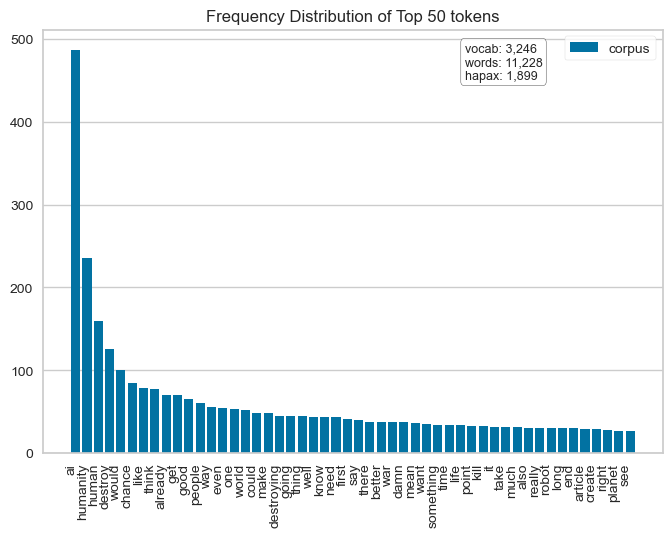

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [105]:
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

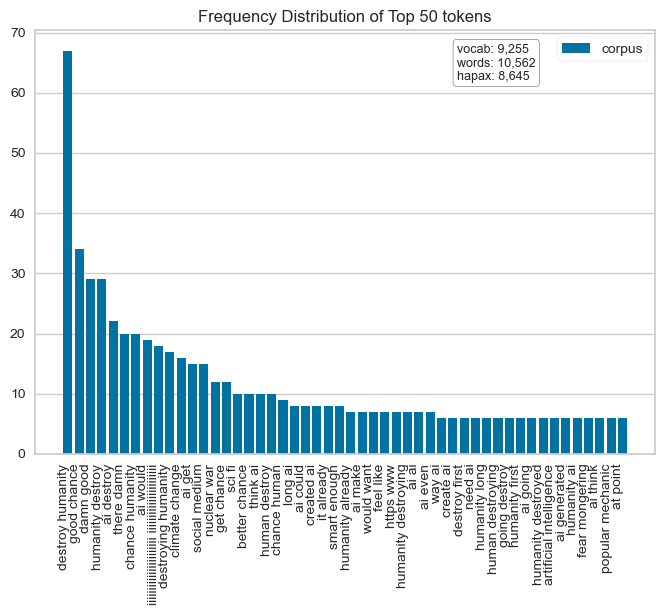

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [106]:
vectorizer = CountVectorizer(ngram_range=(2,2))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

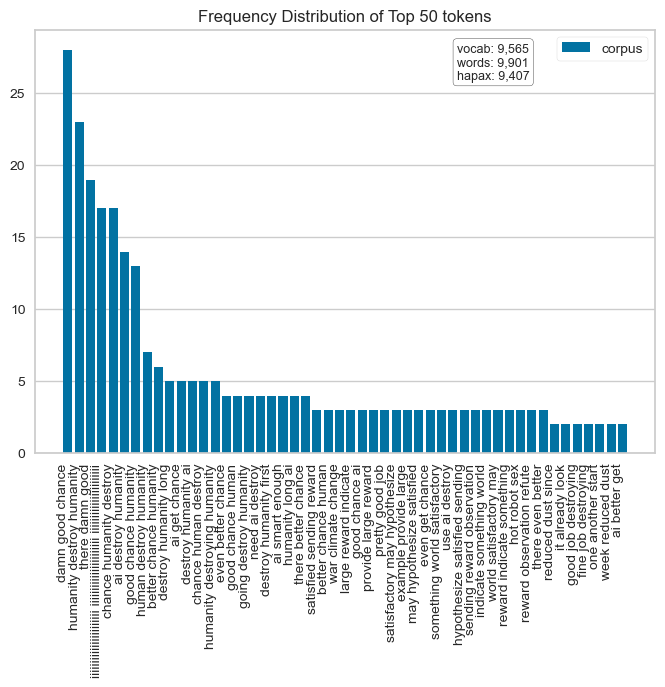

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [107]:
# Let's try 3-grams
vectorizer = CountVectorizer(ngram_range=(3,3))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

done in 0.287s.


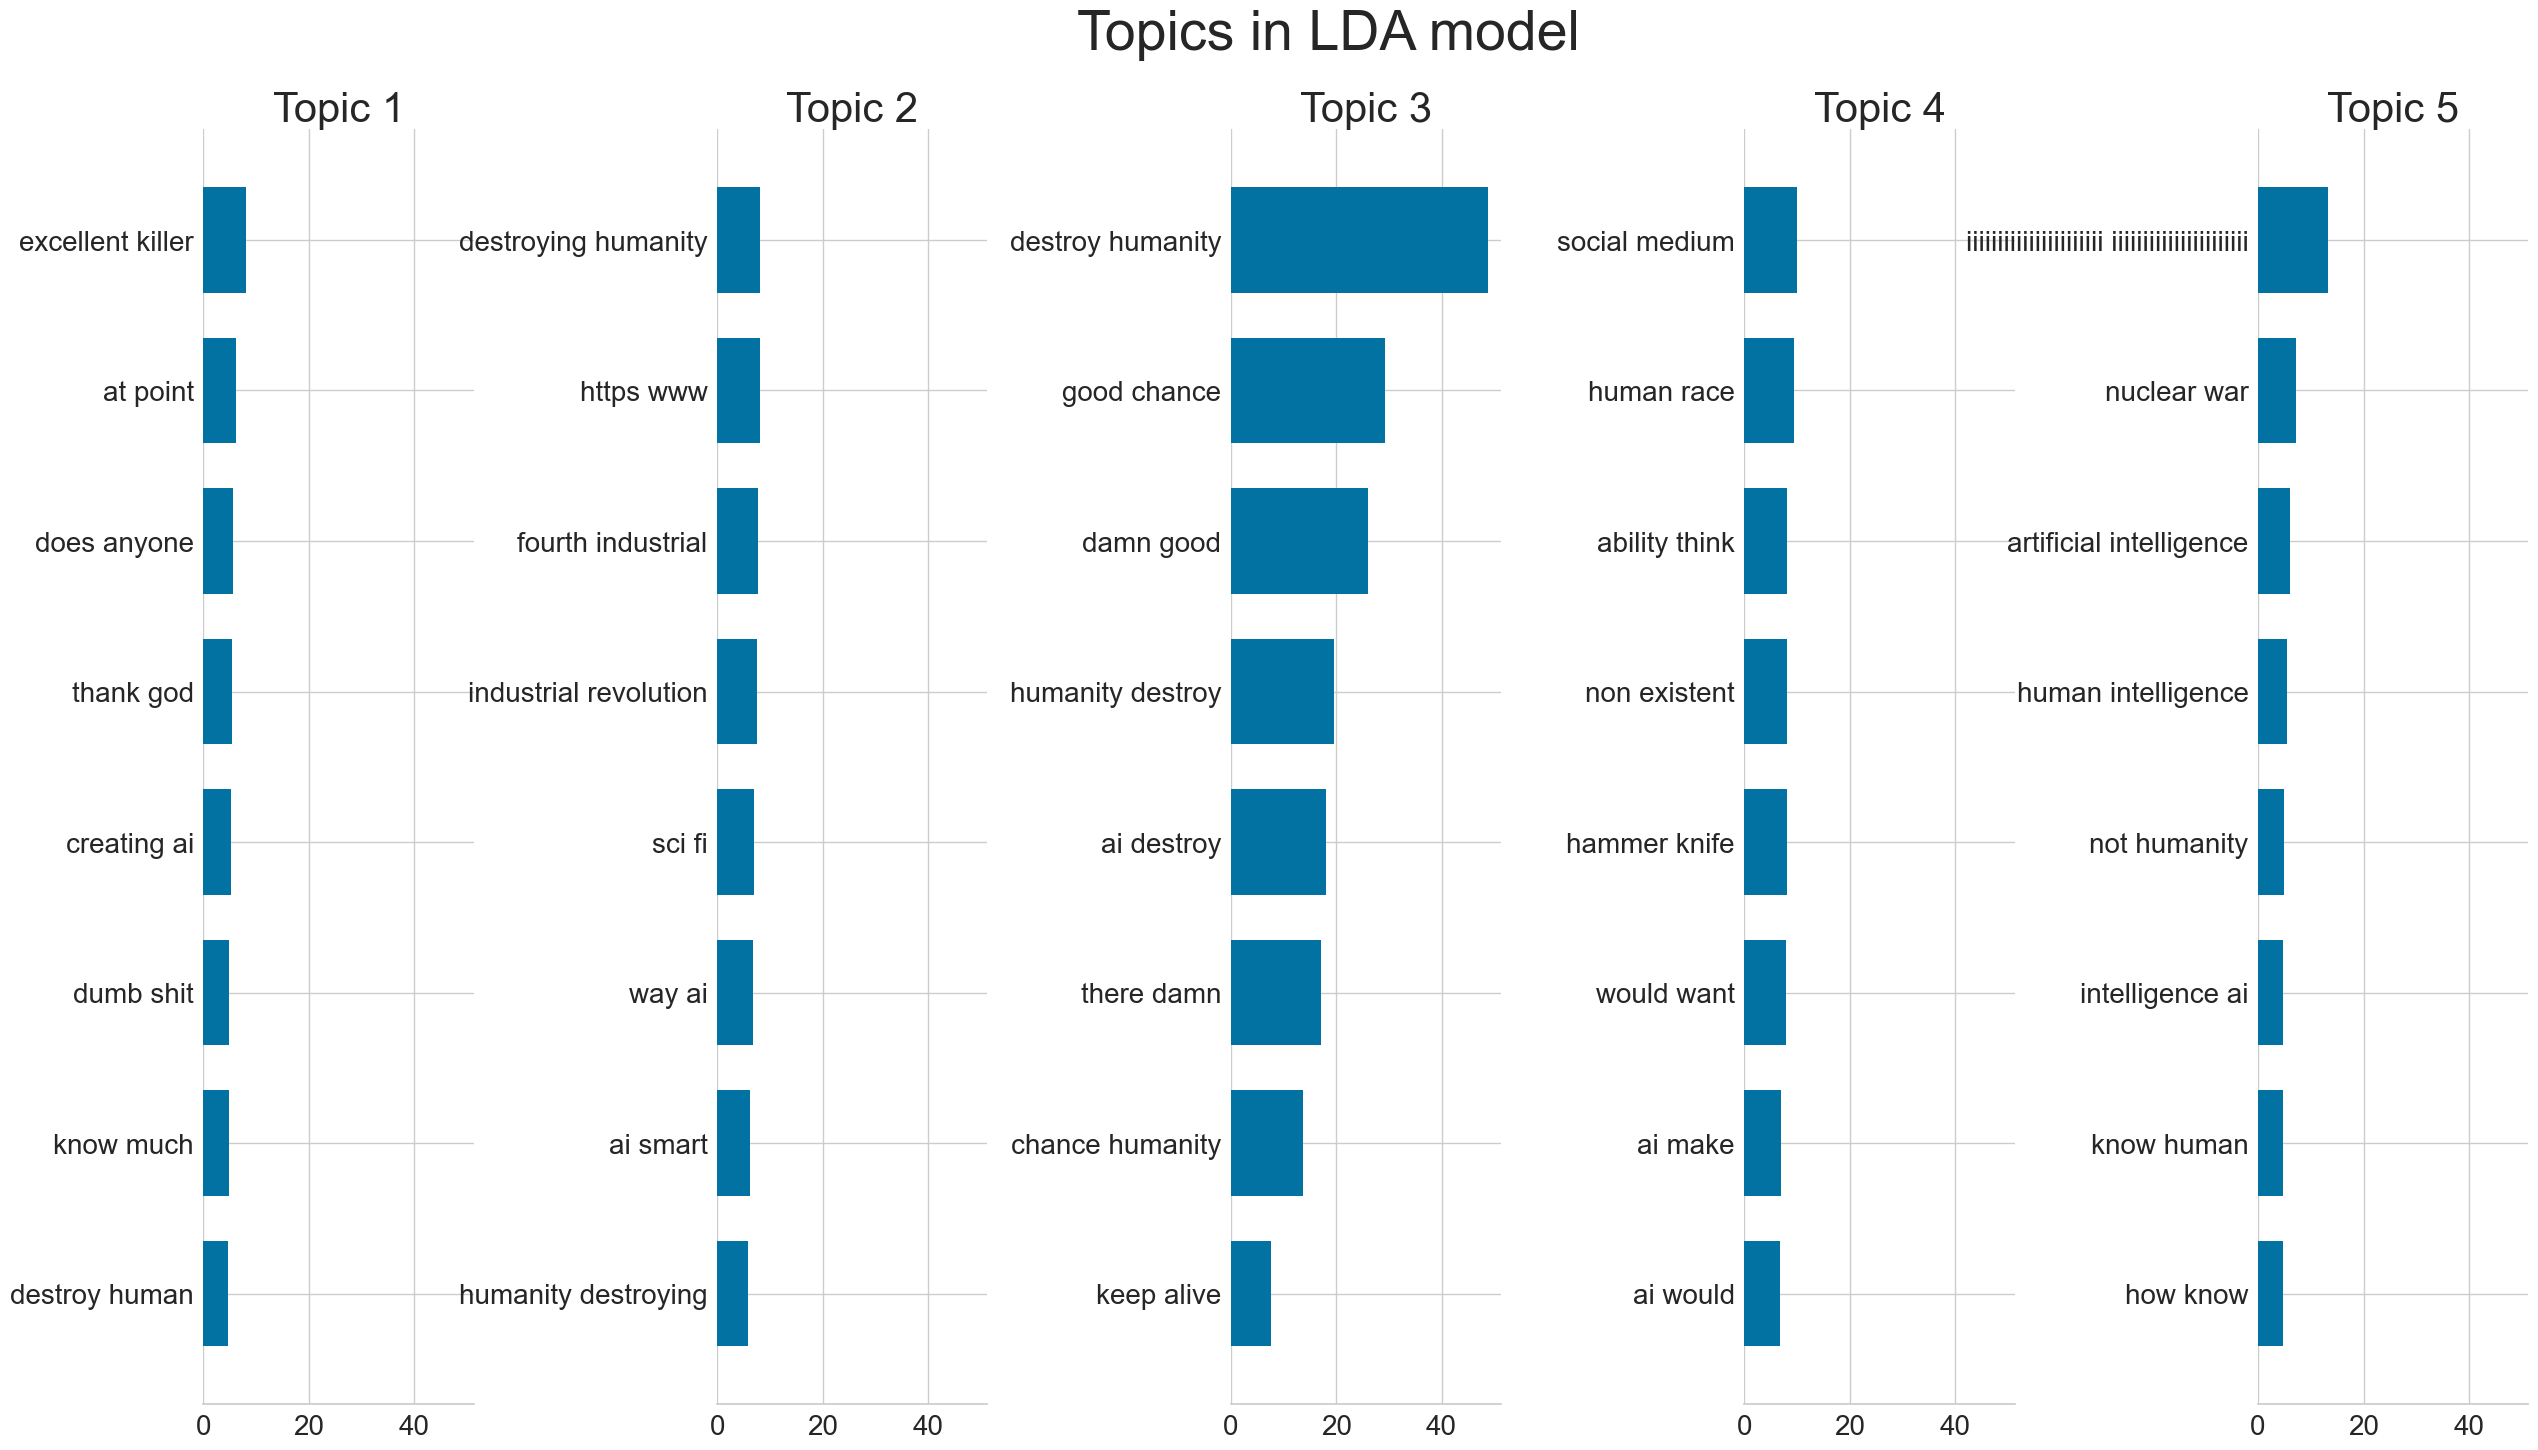

In [108]:
n_samples = 3000
n_features = 2000 
n_components = 5 # number of topics
n_top_words = 8  # number of topic words

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(2,2))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

done in 0.237s.


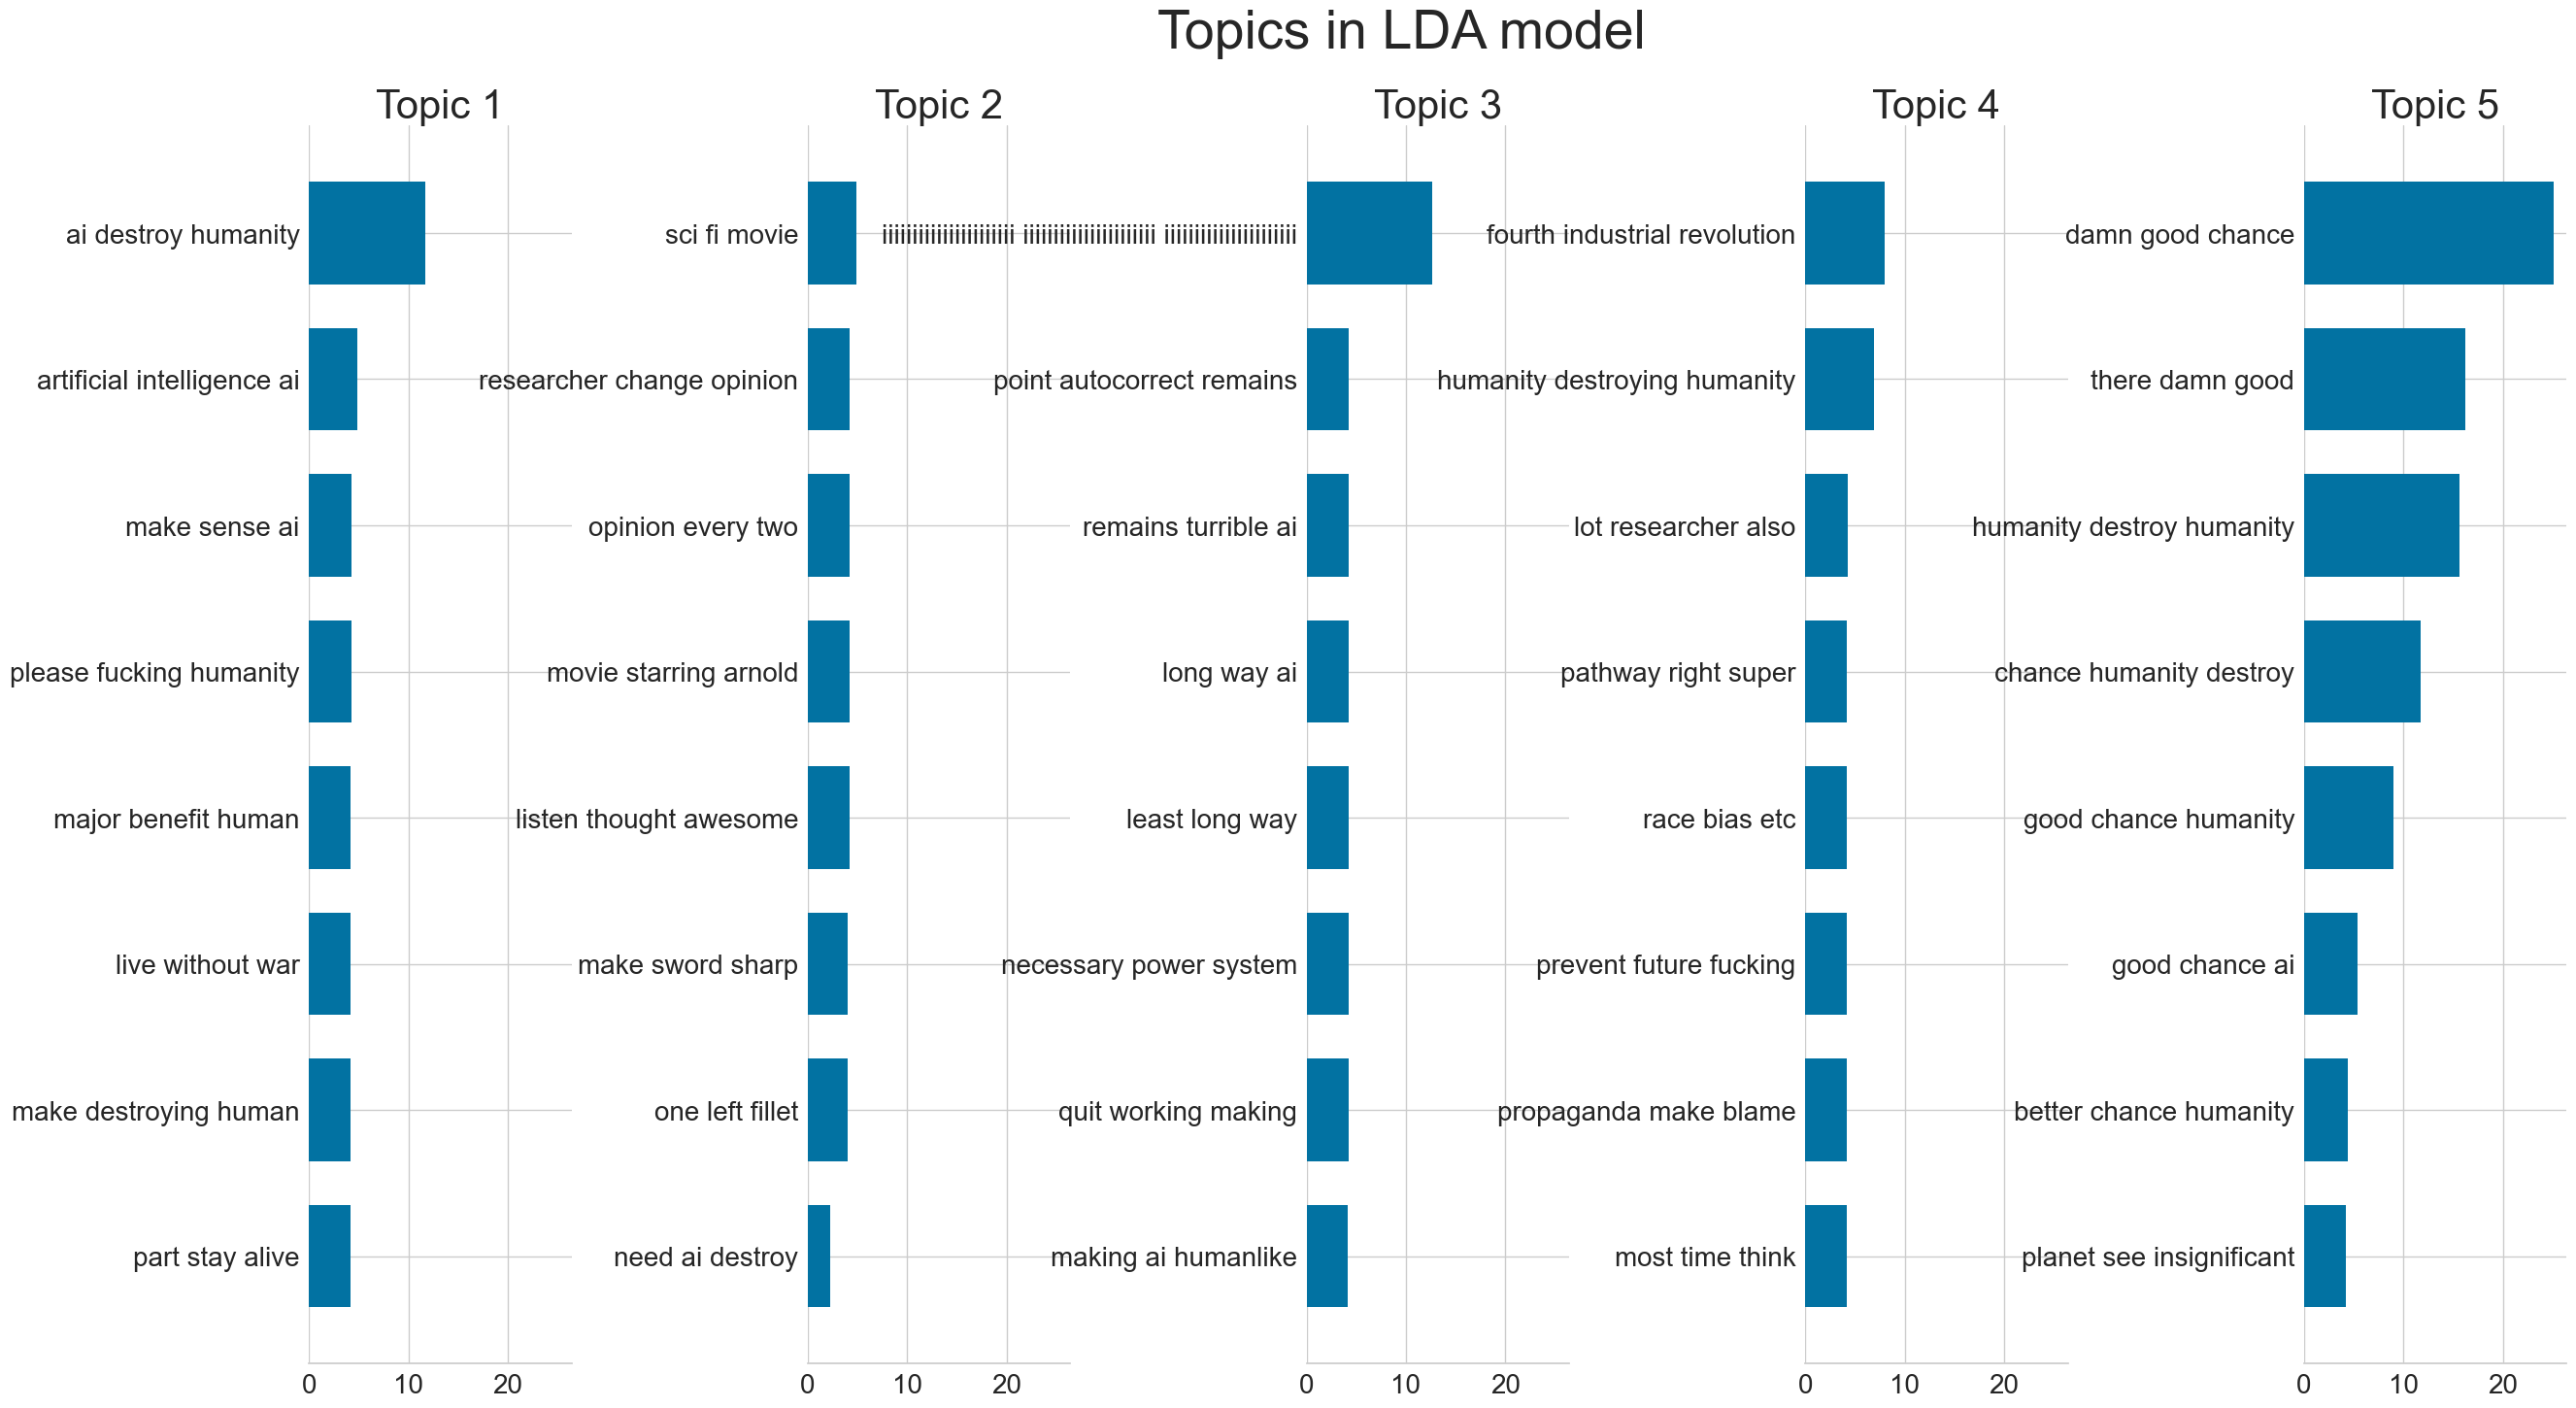

In [109]:
# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(3,3))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')